# Adult Census Data

**Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.**

### Data Information
- Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
- Prediction task is to determine whether a person makes over 50K a year.

### Attribute Information
- Listing of attributes: >50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

URL: https://archive.ics.uci.edu/ml/datasets/adult

In [128]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

import tensorflow as tf


import warnings
warnings.filterwarnings('ignore')

In [129]:
print("Checking for physical Tensorflow or GPU devices -->")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

Checking for physical Tensorflow or GPU devices -->
: /physical_device:CPU:0


In [130]:
# Set the GPU/TPU device name
SET_DEVICE = 'CPU:0'
# SET_DEVICE = 'GPU:0'

## Data Exploration and Pre-Processing

In [131]:
# change the input path if running from local
# input_start_path = '/kaggle/input/incomedata/'
# if local same folder uncomment following
# input_start_path = './'
url_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/'

columnNames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
              'sex','capital-gain','capital-loss','hours-per-week','native-country','class']

adult_df = pd.read_csv(url_path+'adult.data', names=columnNames, header=None, sep=', ',engine='python')
adult_df_test = pd.read_csv(url_path+'adult.test', header=None,names=columnNames, skiprows=1,sep=', ',engine='python')

In [132]:
# Train data
adult_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [133]:
# Test data
adult_df_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [134]:
# class values in test file ends with '.' hence cleaning reqired
adult_df_test[['class','noise']] = adult_df_test['class'].str.split('.',expand=True)
adult_df_test = adult_df_test.drop(columns=['noise'])

In [135]:
# Dimensions
print("Train: {}, Test:{}".format(adult_df.shape,adult_df_test.shape))

Train: (32561, 15), Test:(16281, 15)


In [136]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [137]:
adult_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [138]:
# Missing values - '?'
adult_df = adult_df.replace('?',math.nan)
adult_df_test = adult_df_test.replace('?',math.nan)


**Missing values in the original data set were present as '?'. Created data by replacing missing with nan values**

In [139]:
# Missing values
print("Train Data total missing values observed in --")
print(adult_df.isna().sum()[adult_df.isna().sum()>0])

print("\nTest Data total missing values observed in --")
print(adult_df_test.isna().sum()[adult_df.isna().sum()>0])

print("Shape: Train: {}, Test:{}".format(adult_df.shape,adult_df_test.shape))

Train Data total missing values observed in --
workclass         1836
occupation        1843
native-country     583
dtype: int64

Test Data total missing values observed in --
workclass         963
occupation        966
native-country    274
dtype: int64
Shape: Train: (32561, 15), Test:(16281, 15)


In [140]:
# Utility functions

# Dropping the Null value rows from train and test
def drop_null(df,df_test):
    print(" Shape Before: Train: {}, Test:{}".format(df.shape,df_test.shape))
    df = df.dropna()
    df_test = df_test.dropna()
    print(" Shape After: Train: {}, Test:{}".format(df.shape,df_test.shape))
    return df,df_test

# Dropping same columns from train and test
def drop_cols(df,df_test,_list):
    print(" Shape Before: Train: {}, Test:{}".format(df.shape,df_test.shape))
    df = df.drop(columns=_list)
    df_test = df_test.drop(columns=_list)
    print(" Shape After: Train: {}, Test:{}".format(df.shape,df_test.shape))
    return df,df_test

# Plot count of classes in a feature
def count_plot(df,col_name,title="",fig_height =15, fig_width =12, save_fig_name=None, subplot_row=2, subplot_col=1, subplot_num=1):
    fig = plt.figure(figsize=(fig_width,fig_height))
    plt.subplot(subplot_row, subplot_col, subplot_num)
    plt.title(title)
    ax = sns.countplot(data=df,  y=col_name)
    total = len(df[col_name])
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    
    if(save_fig_name == None):
        return plt
    else:
        plt.savefig(save_fig_name+".png")
        return plt
    
# plot count of data point in features w.r.t class >50k and <=50k
def class_plot(df,feature,title="", save_fig_name=None):
    d = df[[feature,'class']]
    d.groupby('class')[feature].value_counts().unstack(0).plot.barh()
    plt.title(title)
    if(save_fig_name == None):
        return plt
    else:
        plt.savefig(save_fig_name+".png")
        return plt

In [141]:
adult_df.groupby(['education','education-num','class'])['class'].count()

education     education-num  class
10th          6              <=50K     871
                             >50K       62
11th          7              <=50K    1115
                             >50K       60
12th          8              <=50K     400
                             >50K       33
1st-4th       2              <=50K     162
                             >50K        6
5th-6th       3              <=50K     317
                             >50K       16
7th-8th       4              <=50K     606
                             >50K       40
9th           5              <=50K     487
                             >50K       27
Assoc-acdm    12             <=50K     802
                             >50K      265
Assoc-voc     11             <=50K    1021
                             >50K      361
Bachelors     13             <=50K    3134
                             >50K     2221
Doctorate     16             <=50K     107
                             >50K      306
HS-grad       9    

**education and education-num feature represent same information hence one column can be removed**

In [142]:
# removing educaion
_list = ['education']
adult_df,adult_df_test = drop_cols(adult_df,adult_df_test,_list)

 Shape Before: Train: (32561, 15), Test:(16281, 15)
 Shape After: Train: (32561, 14), Test:(16281, 14)


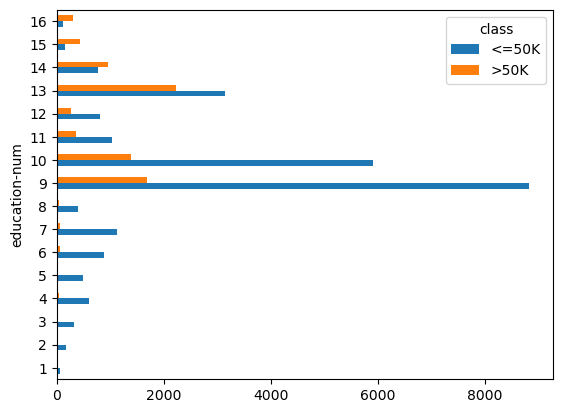

In [143]:
class_plot(adult_df,'education-num').show()

**We have 16 levels of eduatcation categories, due to imbalance in dataset, once option can be to minimise the existing categories. So grouping the 16 categories into 4 categories with each category with max of 5 levels**
- education-num 0-5 -> 0
- 6-10 -> 1
- 11-15 -> 2
- 16 -> 3

In [144]:
#adult_df['education-num'].replace{}
adult_df.loc[adult_df['education-num']<=5, 'education-num'] = 0
adult_df.loc[(adult_df['education-num']<=10) & (adult_df['education-num']>5), 'education-num'] = 1
adult_df.loc[(adult_df['education-num']<=15) & (adult_df['education-num']>10), 'education-num'] = 2
adult_df.loc[(adult_df['education-num']<=20) & (adult_df['education-num']>15), 'education-num'] = 3

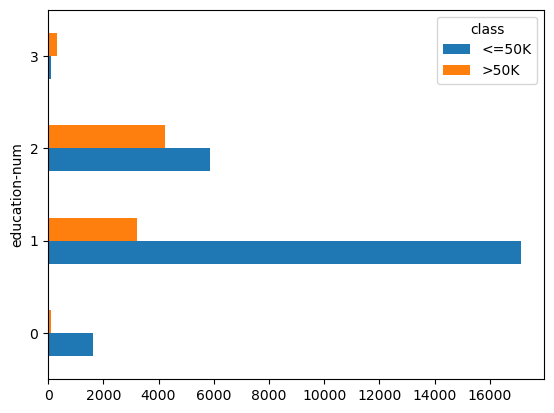

In [145]:
adult_df = adult_df.astype({'education-num': 'object'})
# After creating the variables
class_plot(adult_df,'education-num').show()

In [146]:
# Test Set
adult_df_test.loc[adult_df_test['education-num']<=5, 'education-num'] = 0
adult_df_test.loc[(adult_df_test['education-num']<=10) & (adult_df_test['education-num']>5), 'education-num'] = 1
adult_df_test.loc[(adult_df_test['education-num']<=15) & (adult_df_test['education-num']>10), 'education-num'] = 2
adult_df_test.loc[(adult_df_test['education-num']<=20) & (adult_df_test['education-num']>15), 'education-num'] = 3
adult_df_test = adult_df_test.astype({'education-num': 'object'})

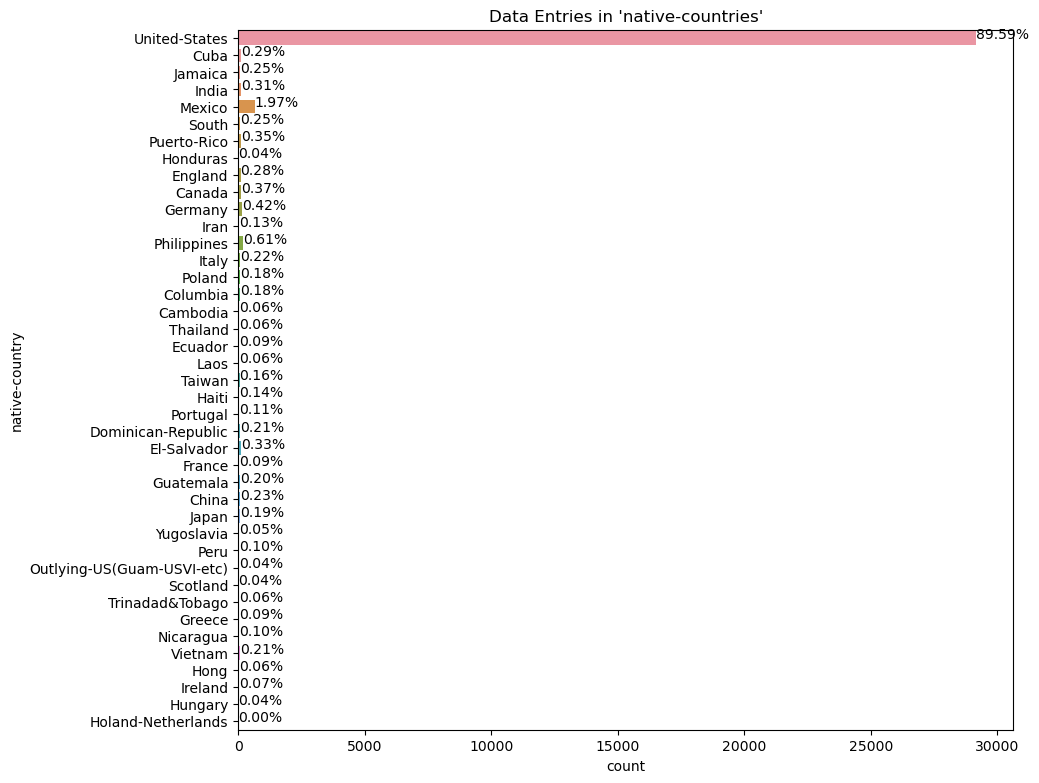

In [147]:
# Native country 
count_plot(adult_df,"native-country",title="Data Entries in 'native-countries'",fig_height=20,fig_width=10).show()

**As we can see the the feature 'native-country is significantly inbalanced with maximum data points (90%) from USA. Similar pattern seen in test data as well. Hence dropping this redundant column deemed ideal**

In [148]:
# Dropping Native Country
_list = ['native-country']
adult_df,adult_df_test = drop_cols(adult_df,adult_df_test,_list)

 Shape Before: Train: (32561, 14), Test:(16281, 14)
 Shape After: Train: (32561, 13), Test:(16281, 13)


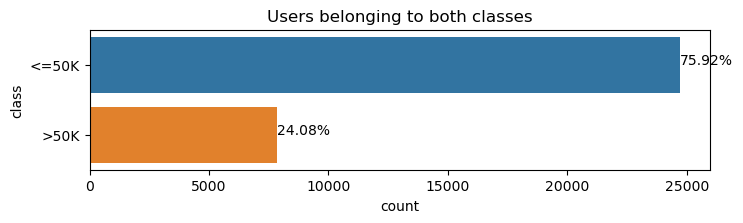

In [149]:
# Users belonging to both classes
count_plot(adult_df,"class",title="Users belonging to both classes",fig_height=4,fig_width=8).show()

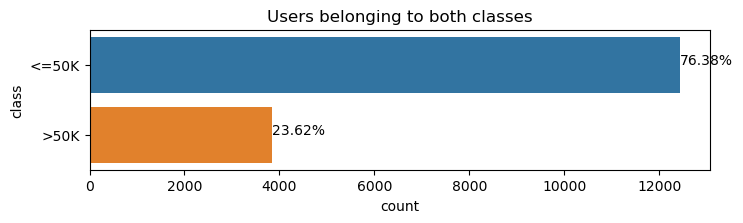

In [150]:
count_plot(adult_df_test,"class",title="Users belonging to both classes",fig_height=4,fig_width=8).show()

**Majority of users in the training data belong to the class with income less that or equal to 50,000 USD**

In [151]:
# Before further exploration we drop the missing values
adult_df,adult_df_test = drop_null(adult_df,adult_df_test)

 Shape Before: Train: (32561, 13), Test:(16281, 13)
 Shape After: Train: (30718, 13), Test:(15315, 13)


**Some visualisations on the available feature w.r.t class label as follows:**

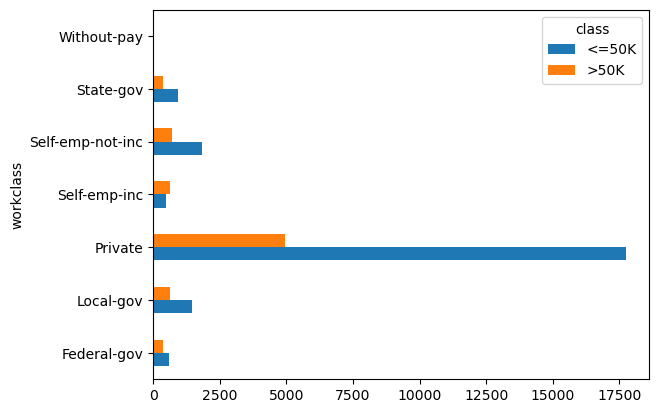

In [152]:
class_plot(adult_df,'workclass').show()

**As we can see most of the users belong to private work class with majority having income less than 50K. Also we can see similar situation of unbalance w.r.t ach category. Here we opt for making 2 categories w.r.t government, gov and non-gov**
- Private, Self-emp-not-inc, Self-emp-inc, Without-pay -> Non-Gov
- State-gov, Federal-gov, Local-gov -> Gov

In [153]:
# 'Non-Gov' - 0
# 'Gov' - 1
def convert_workclass(df):
    df.loc[(df['workclass']=='Private') | (df['workclass']=='Self-emp-not-inc') | 
           (df['workclass']=='Self-emp-inc') | (df['workclass']=='Without-pay'), 'workclass'] = 'Non-Gov'
    df.loc[(df['workclass']=='State-gov') | (df['workclass']=='Federal-gov') | 
           (df['workclass']=='Local-gov'), 'workclass'] = 'Gov'
    
    
    return df.astype({'workclass': 'object'})

adult_df = convert_workclass(adult_df)

In [154]:
adult_df_test = convert_workclass(adult_df_test)

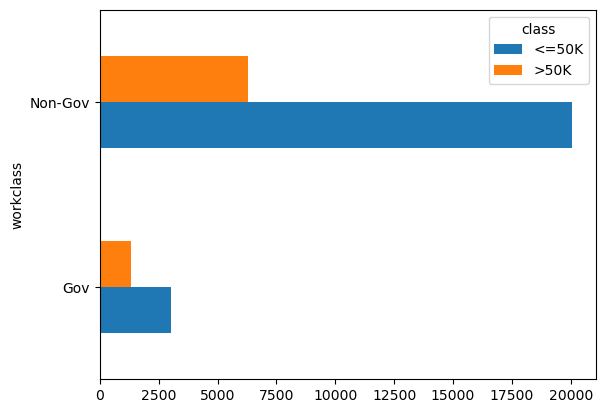

In [155]:
#  After minimising category
class_plot(adult_df,'workclass').show()

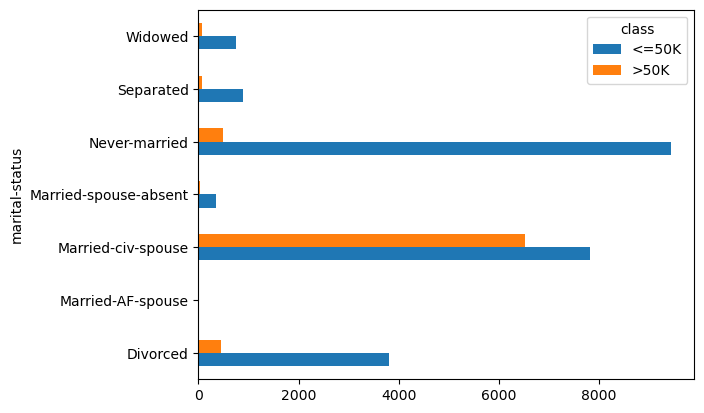

In [156]:
class_plot(adult_df,'marital-status').show()

**We can minimise the categories with married (with spouse present) and non-married or single**
- 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent' -> single
- 'Married-civ-spouse', 'Married-AF-spouse' -> Married



In [157]:
# 'Single' - 0
# 'Married' - 1
def convert_marital_status(df):
    df.loc[(df['marital-status']=='Never-married') | (df['marital-status']=='Divorced') | 
           (df['marital-status']=='Married-spouse-absent') | (df['marital-status']=='Separated') | (df['marital-status']=='Widowed'), 'marital-status'] = 'Single'
    df.loc[(df['marital-status']=='Married-civ-spouse') | (df['marital-status']=='Married-AF-spouse'), 'marital-status'] = 'Married'
    
    
    return df.astype({'marital-status': 'object'})

adult_df = convert_marital_status(adult_df)
adult_df_test = convert_marital_status(adult_df_test)

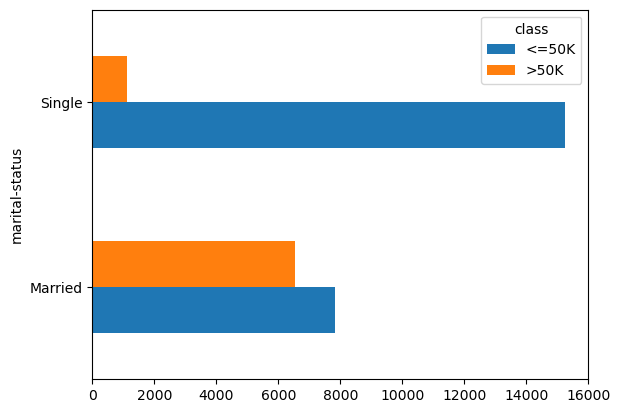

In [158]:
#  After minimising category
class_plot(adult_df,'marital-status').show()

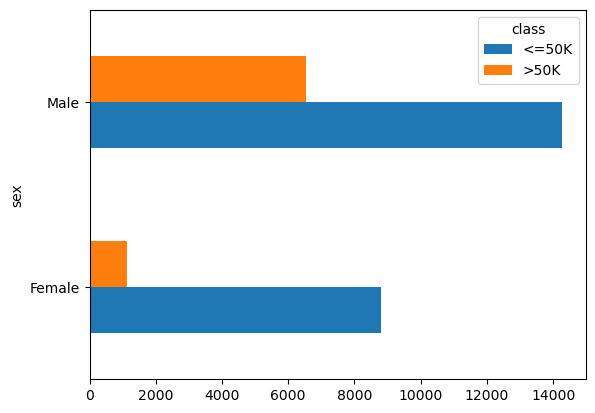

In [159]:
class_plot(adult_df,'sex').show()

**Data comprises mainly of Male users**

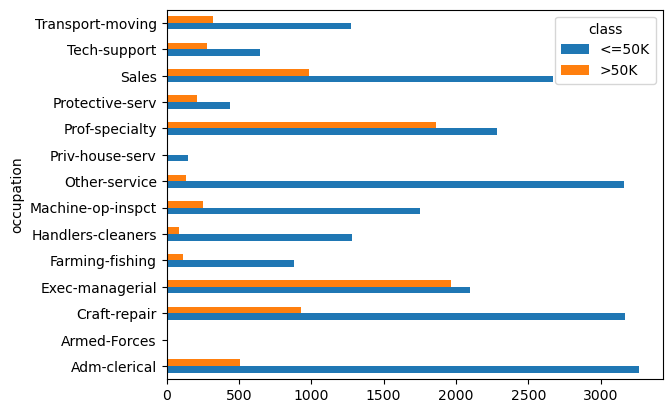

In [160]:
class_plot(adult_df,'occupation').show()

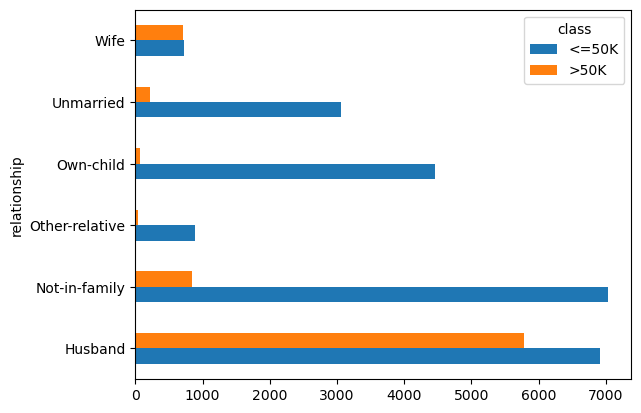

In [161]:
class_plot(adult_df,'relationship').show()

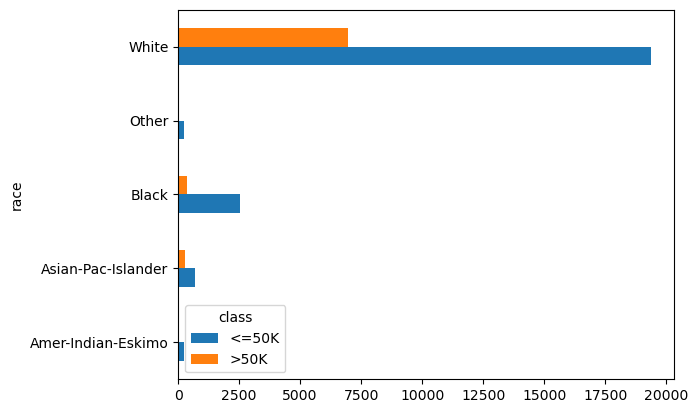

In [162]:
class_plot(adult_df,'race').show()

**We can see the imbalance in the data set w.r.t race as majority of user here belong to 'White'. We can try to club the rest of the categories into non-white**
- 'White' -> White
- 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other' -> Non-White

In [163]:
def convert_race(df):
    df.loc[(df['race']=='Black') | (df['race']=='Asian-Pac-Islander') | 
           (df['race']=='Amer-Indian-Eskimo') | (df['race']=='Other'), 'race'] = 'Non-White'
    df.loc[(df['race']=='White'), 'race'] = 'White'
    
    
    return df.astype({'race': 'object'})

adult_df = convert_race(adult_df)
adult_df_test = convert_race(adult_df_test)

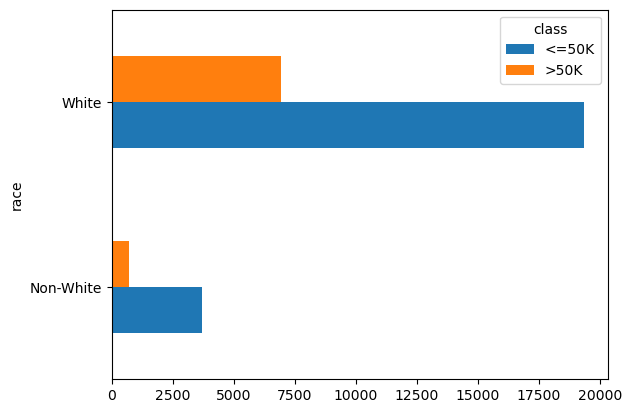

In [164]:
#  After minimising category
class_plot(adult_df,'race').show()

**The 'race' feature is likely to be less useful due to the imbalance**

In [165]:
# Converting th class column to binary 1-0
# <=50K -> 0
# >50K -> 1
adult_df['class'].replace({'<=50K':0,'>50K':1},inplace=True)
adult_df_test['class'].replace({'<=50K':0,'>50K':1},inplace=True)

adult_df.head(2)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,39,Gov,77516,2,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Non-Gov,83311,2,Married,Exec-managerial,Husband,White,Male,0,0,13,0


### Checking the numeric variables

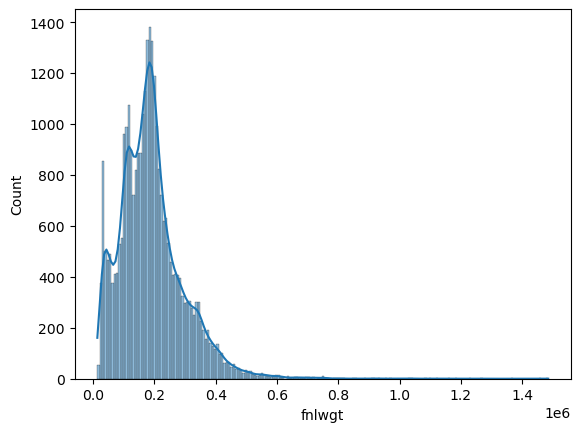

In [166]:
# Highly skewed
sns.histplot(data = adult_df,x = 'fnlwgt', kde=True)
plt.show()

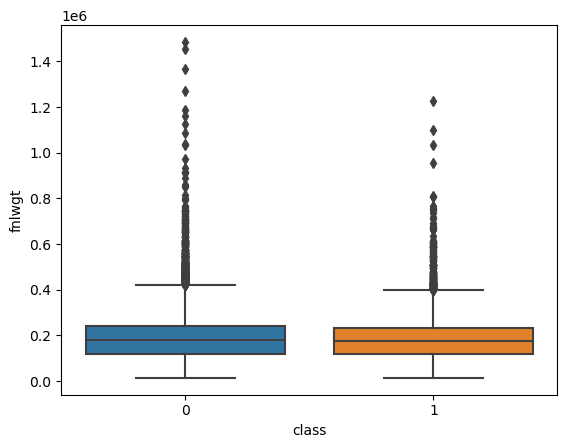

In [167]:
sns.boxplot(data = adult_df,x = 'class',y = 'fnlwgt')
plt.show()

In [168]:
# Checking point biserial correlation for relation betwen numerical variables and class variables

# independant Feature names
# categorical
categorical_columns = adult_df.loc[:, adult_df.dtypes == object].columns
# numerical
numerical_columns = adult_df.loc[:, adult_df.dtypes != object].drop(columns=['class']).columns

for i in numerical_columns:
    print(i,'-->',round(st.pointbiserialr(adult_df['class'],adult_df[i])[0],6))

age --> 0.242431
fnlwgt --> -0.009446
capital-gain --> 0.221871
capital-loss --> 0.151461
hours-per-week --> 0.228547


In [169]:
# Fnlwgt has the least correlation hence we can drop the column
_list = ['fnlwgt']
adult_df,adult_df_test = drop_cols(adult_df,adult_df_test,_list)

 Shape Before: Train: (30718, 13), Test:(15315, 13)
 Shape After: Train: (30718, 12), Test:(15315, 12)


**The remaining numeric variables athough are numeric but aer finite hence we can convert them to categories**

In [170]:
# Age although in numeric variable has limited values
adult_df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86])

In [171]:
print("Minimum age: {}\nMaximum age: {}\nMean age: {}\nMedian age:{}".format(
     min(adult_df['age']), max(adult_df['age']), np.mean(adult_df['age']), np.median(adult_df['age'])))

Minimum age: 17
Maximum age: 90
Mean age: 38.44358356663845
Median age:37.0


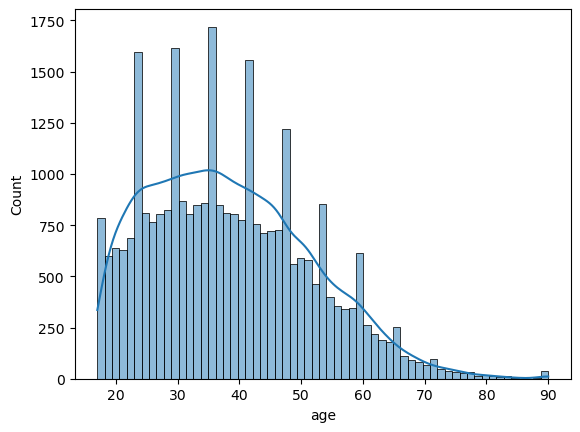

In [172]:
sns.histplot(data = adult_df,x = 'age', kde=True)
plt.show()

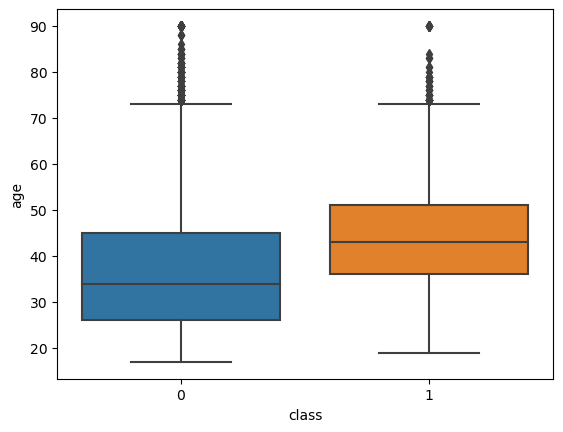

In [173]:
sns.boxplot(data = adult_df,x = 'class',y = 'age')
plt.show()

In [174]:
# So we can create age numbered categories (nominal)
# age<=25 = 0
# 25<age<=35 = 1 ...
#....
# 85<age<=95 = 7
# ___________

def convert_age(df):
    df.loc[(df['age']<=25),'age'] = 0      
    df.loc[(df['age']>25) & 
           (df['age']<=35), 'age'] = 1
    df.loc[(df['age']>35) & 
           (df['age']<=45), 'age'] = 2
    df.loc[(df['age']>45) & 
           (df['age']<=55), 'age'] = 3
    df.loc[(df['age']>55) & 
           (df['age']<=65), 'age'] = 4
    df.loc[(df['age']>65) & 
           (df['age']<=75), 'age'] = 5
    df.loc[(df['age']>75) & 
           (df['age']<=85), 'age'] = 6
    df.loc[(df['age']>85) & 
           (df['age']<=95), 'age'] = 7
    
    return df.astype({'age': 'object'})

adult_df = convert_age(adult_df)
adult_df_test = convert_age(adult_df_test)

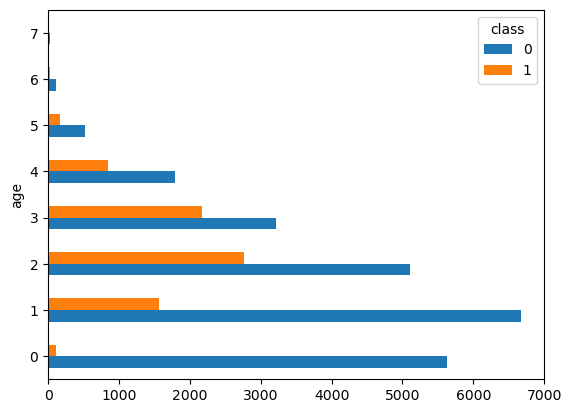

In [175]:
#  After creating age category
class_plot(adult_df,'age').show()

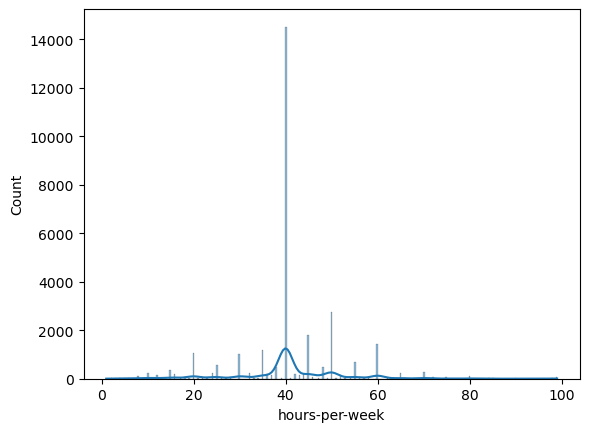

In [176]:
# hours-per-week
sns.histplot(data = adult_df,x = 'hours-per-week', kde=True)
plt.show()

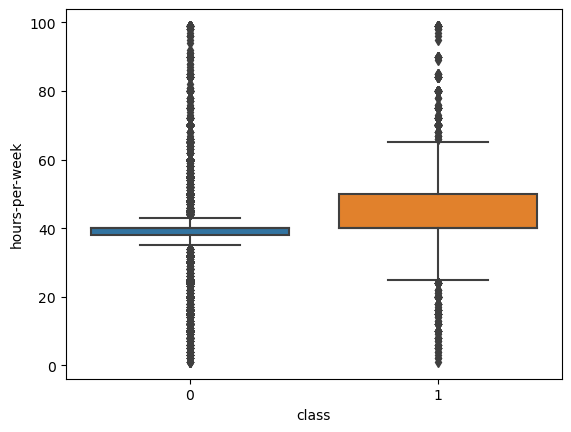

In [177]:
sns.boxplot(data = adult_df,x = 'class',y = 'hours-per-week')
plt.show()

In [178]:
print("Minimum hours-per-week: {}\nMaximum hours-per-week: {}\nMean hours-per-week: {}\nMedian hours-per-week:{}".format(
     min(adult_df['hours-per-week']), max(adult_df['hours-per-week']), np.mean(adult_df['hours-per-week']), np.median(adult_df['hours-per-week'])))

Minimum hours-per-week: 1
Maximum hours-per-week: 99
Mean hours-per-week: 40.94931310632202
Median hours-per-week:40.0


In [179]:
# hours-per-week also has few values and can be categorized
adult_df['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  4, 17, 68,
        3, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [180]:
# Similar categorization can be done as seen in age
# 10 categories (nominal)
def convert_hours(df):
    df.loc[(df['hours-per-week']<=10),'hours-per-week'] = 0      
    df.loc[(df['hours-per-week']>10) & 
           (df['hours-per-week']<=20), 'hours-per-week'] = 1
    df.loc[(df['hours-per-week']>20) & 
           (df['hours-per-week']<=30), 'hours-per-week'] = 2
    df.loc[(df['hours-per-week']>30) & 
           (df['hours-per-week']<=40), 'hours-per-week'] = 3
    df.loc[(df['hours-per-week']>40) & 
           (df['hours-per-week']<=50), 'hours-per-week'] = 4
    df.loc[(df['hours-per-week']>50) & 
           (df['hours-per-week']<=60), 'hours-per-week'] = 5
    df.loc[(df['hours-per-week']>60) & 
           (df['hours-per-week']<=70), 'hours-per-week'] = 6
    df.loc[(df['hours-per-week']>70) & 
           (df['hours-per-week']<=80), 'hours-per-week'] = 7
    df.loc[(df['hours-per-week']>80) & 
           (df['hours-per-week']<=90), 'hours-per-week'] = 8
    df.loc[(df['hours-per-week']>90) & 
           (df['hours-per-week']<=100), 'hours-per-week'] = 9
    
    return df.astype({'hours-per-week': 'object'})

adult_df = convert_hours(adult_df)
adult_df_test = convert_hours(adult_df_test)

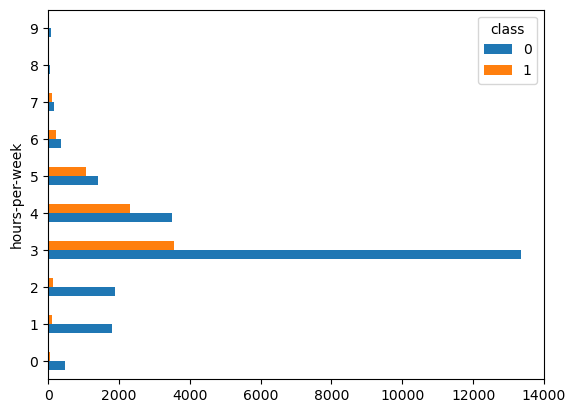

In [181]:
#  After creating hours-per-week category
class_plot(adult_df,'hours-per-week').show()

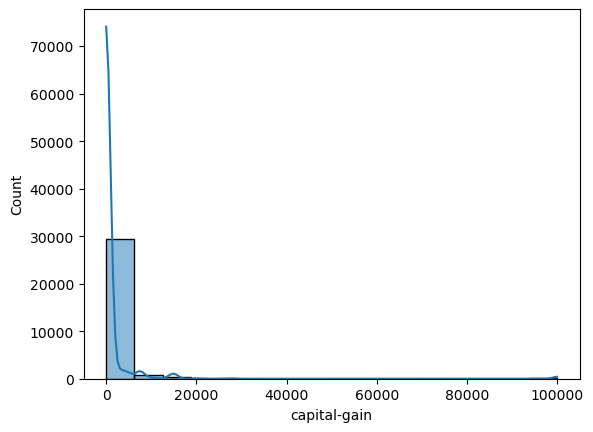

In [182]:
# capital-gain
sns.histplot(data = adult_df,x = 'capital-gain', kde=True)
plt.show()

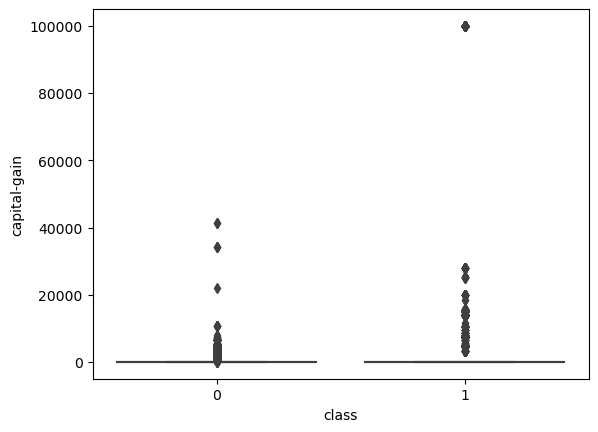

In [183]:
sns.boxplot(data = adult_df,x = 'class',y = 'capital-gain')
plt.show()

**There is an outlier with capital gain which can be seen in above figure.**

In [184]:
print("Minimum capital-gain: {}\nMaximum capital-gain: {}\nMean capital-gain: {}\nMedian capital-gain:{}".format(
     min(adult_df['capital-gain']), max(adult_df['capital-gain']), np.mean(adult_df['capital-gain']), np.median(adult_df['capital-gain'])))

Minimum capital-gain: 0
Maximum capital-gain: 99999
Mean capital-gain: 1106.0370792369295
Median capital-gain:0.0


In [185]:
len(adult_df['capital-gain'].unique())

118

In [186]:
# 155 values with 99999
adult_df['capital-gain'].value_counts()

0        28129
15024      343
7688       278
7298       244
99999      155
         ...  
6097         1
2538         1
401          1
1455         1
1086         1
Name: capital-gain, Length: 118, dtype: int64

In [187]:
# second max value
adult_df['capital-gain'].nlargest(156)

1246     99999
1368     99999
1482     99999
1528     99999
1616     99999
         ...  
31972    99999
32090    99999
32238    99999
32518    99999
6433     41310
Name: capital-gain, Length: 156, dtype: int64

In [188]:
adult_df_test['capital-gain'].value_counts()

0        14043
15024      165
7688       124
7298       114
99999       84
         ...  
2329         1
3273         1
2346         1
34095        1
2036         1
Name: capital-gain, Length: 111, dtype: int64

In [189]:
# second max value
adult_df_test['capital-gain'].nlargest(85)

83       99999
346      99999
357      99999
418      99999
692      99999
         ...  
16021    99999
16030    99999
16037    99999
16068    99999
3605     41310
Name: capital-gain, Length: 85, dtype: int64

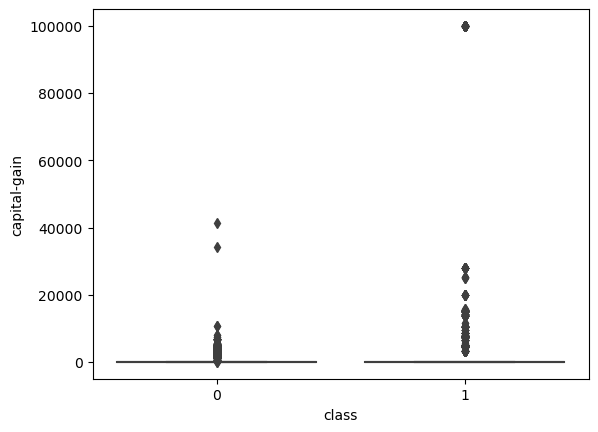

In [190]:
sns.boxplot(data = adult_df_test,x = 'class',y = 'capital-gain')
plt.show()

**With Capital loss we can see an outlier value of 99999 in both train and test set with second max value of 41310. There are two options, either delete these entries with 99999 or include them in a category of above 50000**

In [191]:
# Categorising the Capital Gains
def convert_gain(df):
    df.loc[(df['capital-gain']<=10000),'capital-gain'] = 0      
    df.loc[(df['capital-gain']>10000) & 
           (df['capital-gain']<=20000), 'capital-gain'] = 1
    df.loc[(df['capital-gain']>20000) & 
           (df['capital-gain']<=30000), 'capital-gain'] = 2
    df.loc[(df['capital-gain']>30000) & 
           (df['capital-gain']<=40000), 'capital-gain'] = 3
    df.loc[(df['capital-gain']>40000) & 
           (df['capital-gain']<=50000), 'capital-gain'] = 4
    df.loc[(df['capital-gain']>50000) , 'capital-gain'] = 5
   
    return df.astype({'capital-gain': 'object'})

adult_df = convert_gain(adult_df)
adult_df_test = convert_gain(adult_df_test)

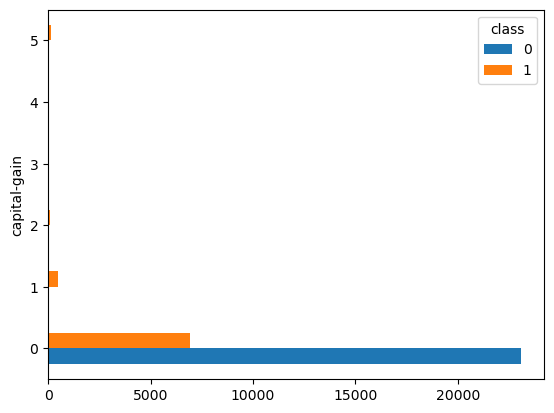

In [192]:
# maximum values are in 0 category because maximum have 0 values (check above)
class_plot(adult_df,'capital-gain').show()

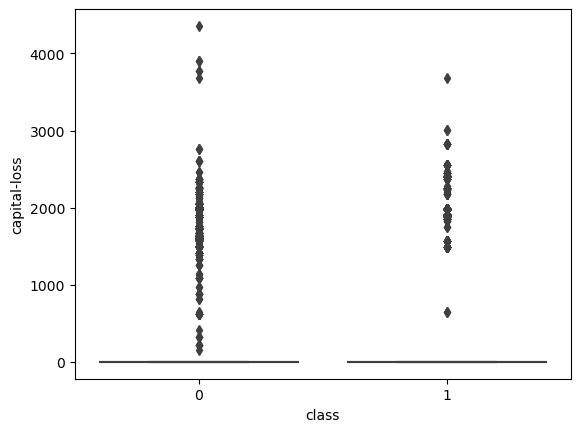

In [193]:
# capital-loss
sns.boxplot(data = adult_df,x = 'class',y = 'capital-loss')
plt.show()

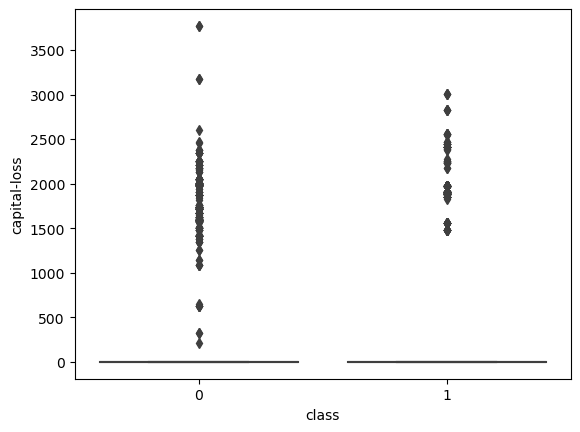

In [194]:
sns.boxplot(data = adult_df_test,x = 'class',y = 'capital-loss')
plt.show()

In [195]:
print("Minimum capital-loss: {}\nMaximum capital-loss: {}\nMean capital-loss: {}\nMedian capital-loss:{}".format(
     min(adult_df['capital-loss']), max(adult_df['capital-loss']), np.mean(adult_df['capital-loss']), np.median(adult_df['capital-loss'])))

Minimum capital-loss: 0
Maximum capital-loss: 4356
Mean capital-loss: 88.91021550882219
Median capital-loss:0.0


In [196]:
adult_df['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628,
       1848, 2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444,
       1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594, 3004, 2231,
       1844,  810, 2824, 2559, 2057, 1974,  974, 2174, 2149, 1735, 1258,
       2129, 2603, 2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683,
       4356, 2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754,
       2472, 1411])

In [197]:
len(adult_df['capital-loss'].unique())

90

In [198]:
# Categorising the Capital Loss
def convert_loss(df):
    df.loc[(df['capital-loss']<=500),'capital-loss'] = 0 
    df.loc[(df['capital-loss']>500) & 
           (df['capital-loss']<=1000), 'capital-loss'] = 1
    df.loc[(df['capital-loss']>1000) & 
           (df['capital-loss']<=1500), 'capital-loss'] = 2
    df.loc[(df['capital-loss']>1500) & 
           (df['capital-loss']<=2000), 'capital-loss'] = 3
    df.loc[(df['capital-loss']>2000) & 
           (df['capital-loss']<=2500), 'capital-loss'] = 4
    df.loc[(df['capital-loss']>2500) & 
           (df['capital-loss']<=3000), 'capital-loss'] = 5
    df.loc[(df['capital-loss']>3000) & 
           (df['capital-loss']<=3500), 'capital-loss'] = 6
    df.loc[(df['capital-loss']>3500) & 
           (df['capital-loss']<=4000), 'capital-loss'] = 7
    df.loc[(df['capital-loss']>4000) & 
           (df['capital-loss']<=4500), 'capital-loss'] = 8
    df.loc[(df['capital-loss']>4500) & 
           (df['capital-loss']<=5000), 'capital-loss'] = 9
    df.loc[(df['capital-loss']>5000) , 'capital-loss'] = 10
   
    return df.astype({'capital-loss': 'object'})

adult_df = convert_loss(adult_df)
adult_df_test = convert_loss(adult_df_test)

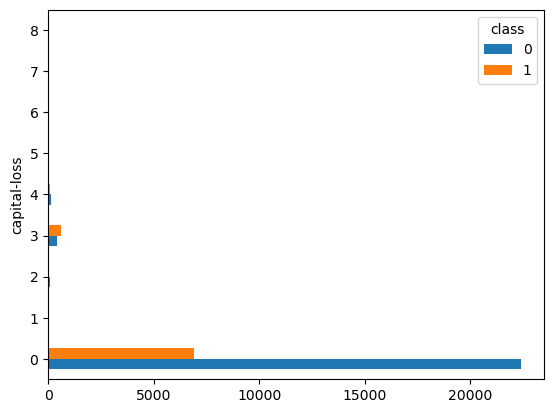

In [199]:
class_plot(adult_df,'capital-loss').show()

In [200]:
# set(adult_df_test['capital-loss'].unique()).difference(set(adult_df['capital-loss'].unique()))

**As we can see capital-loss and capital-gain both had numerical values but finite in number so hence made categorical**

In [201]:
adult_df = adult_df.astype({'class':'object'})
adult_df_test = adult_df_test.astype({'class':'object'})

In [202]:
# All  variables are set to categorical, 
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  object
 1   workclass       30718 non-null  object
 2   education-num   30718 non-null  object
 3   marital-status  30718 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    30718 non-null  object
 6   race            30718 non-null  object
 7   sex             30718 non-null  object
 8   capital-gain    30718 non-null  object
 9   capital-loss    30718 non-null  object
 10  hours-per-week  30718 non-null  object
 11  class           30718 non-null  object
dtypes: object(12)
memory usage: 4.1+ MB


In [203]:
adult_df.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,2,Gov,2,Single,Adm-clerical,Not-in-family,White,Male,0,0,3,0
1,3,Non-Gov,2,Married,Exec-managerial,Husband,White,Male,0,0,1,0
2,2,Non-Gov,1,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,3,0
3,3,Non-Gov,1,Married,Handlers-cleaners,Husband,Non-White,Male,0,0,3,0
4,1,Non-Gov,2,Married,Prof-specialty,Wife,Non-White,Female,0,0,3,0


In [204]:
## Can be further explored for more information

In [205]:
def train_test_split(df, df_test):
    X_train = df.drop(columns=['class'])
    y_train = df['class']
    X_test = df_test.drop(columns=['class'])
    y_test = df_test['class']
    
    return X_train,y_train,X_test,y_test

X_train,y_train,X_test,y_test = train_test_split(adult_df,adult_df_test)

In [206]:
# Copies of our necessary variables
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

In [207]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder

### Checking Feature Importance

Ref URL: https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [208]:
X = X_train_copy.copy()
y = y_train_copy.copy()

X_t = X_test_copy.copy()
y_t = y_test_copy.copy()

# ordinal encoding the categorical variables
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
X_t = encoder.transform(X_t)

# Label encoding class label
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

# Get the variable/feature names later used for plotting
cols = X_train.columns

#### Chi-Square feature selection test - check importance of feature

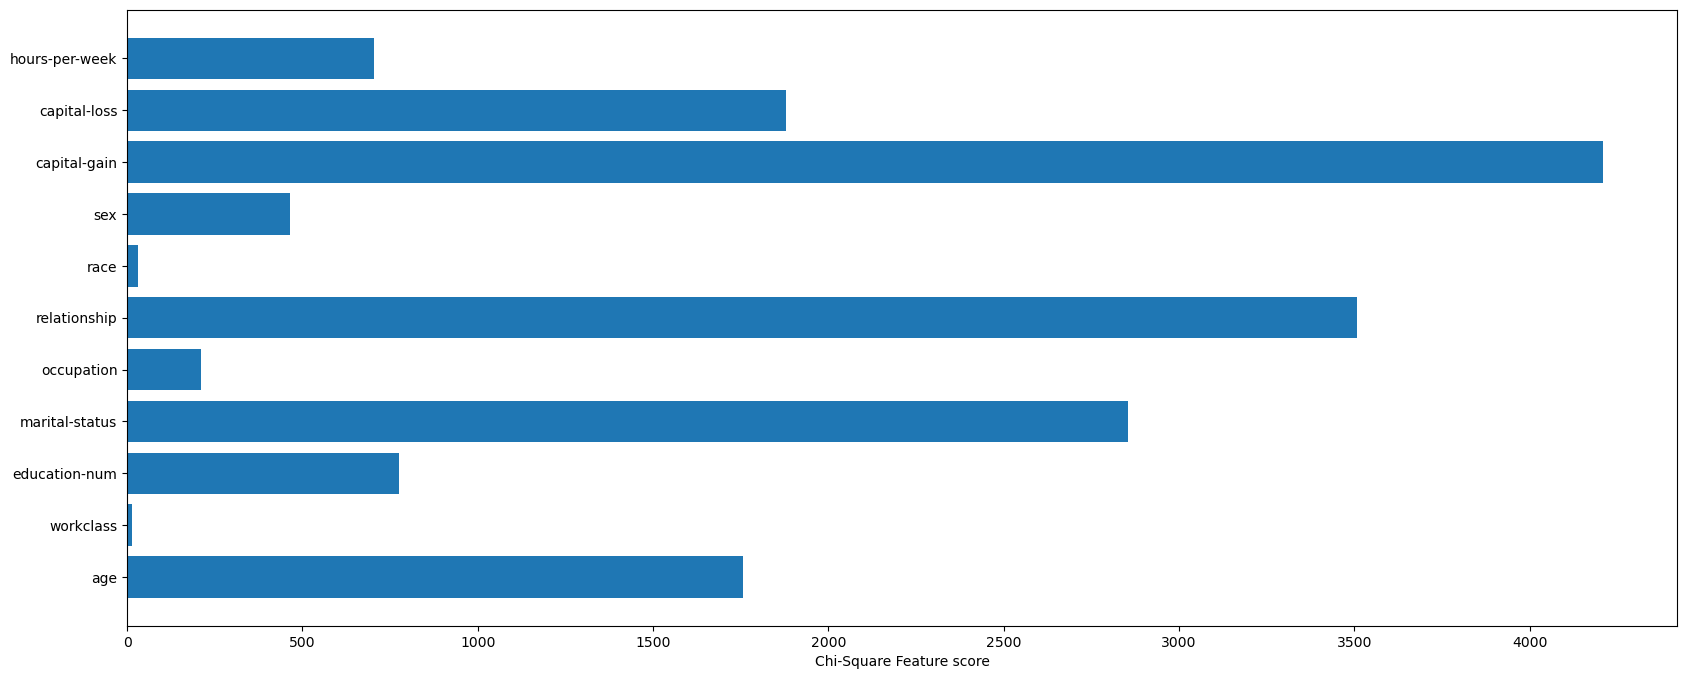

In [209]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def c_test(X_train,y_train):
    # X_train = X_train.to_numpy()
    # y_train = y_train.to_numpy()
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    
    # what are scores for the features
    # for i in range(len(fs.scores_)): print('Feature %s: %f' % (cols[i], fs.scores_[i]))
        
    plt.figure(figsize = (20,8))
    # plot the scores
    plt.barh([i for i in cols],fs.scores_)
    plt.xlabel("Chi-Square Feature score")
    plt.savefig('chisq.png')
    plt.show()
c_test(X,y)

#### Plotting the feature importances using the Random Forrest Regressor

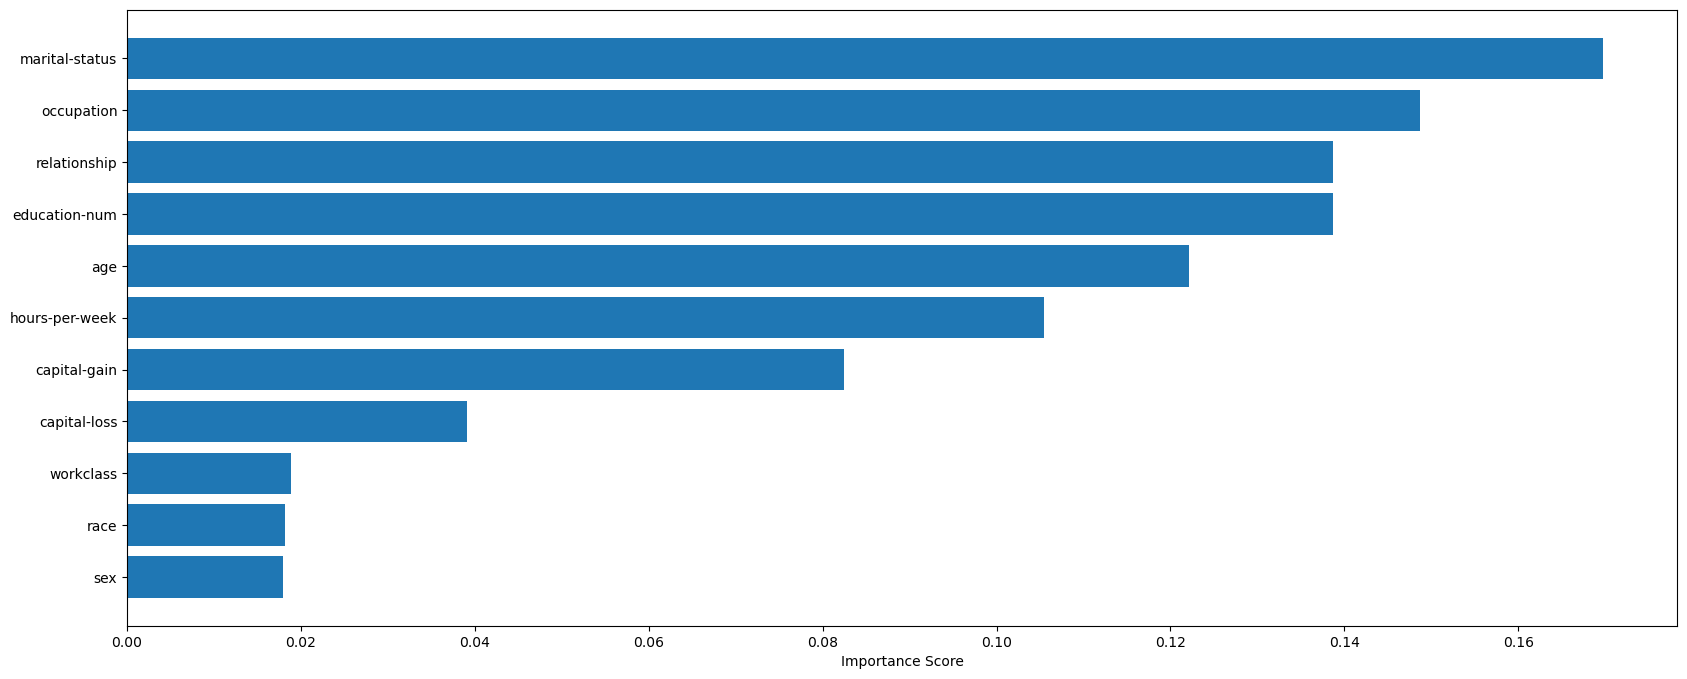

In [210]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
     #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (20,8))
# plot the scores
d = {cols[i]:importance[i] for i in range(len(cols))}
d = sorted(d.items(), key=lambda x:x[1])
plt.barh([i[0] for i in d],[i[1] for i in d])
plt.xlabel("Importance Score")
plt.show()

#### Plotting the feature importances using the Decision Tree Classifier

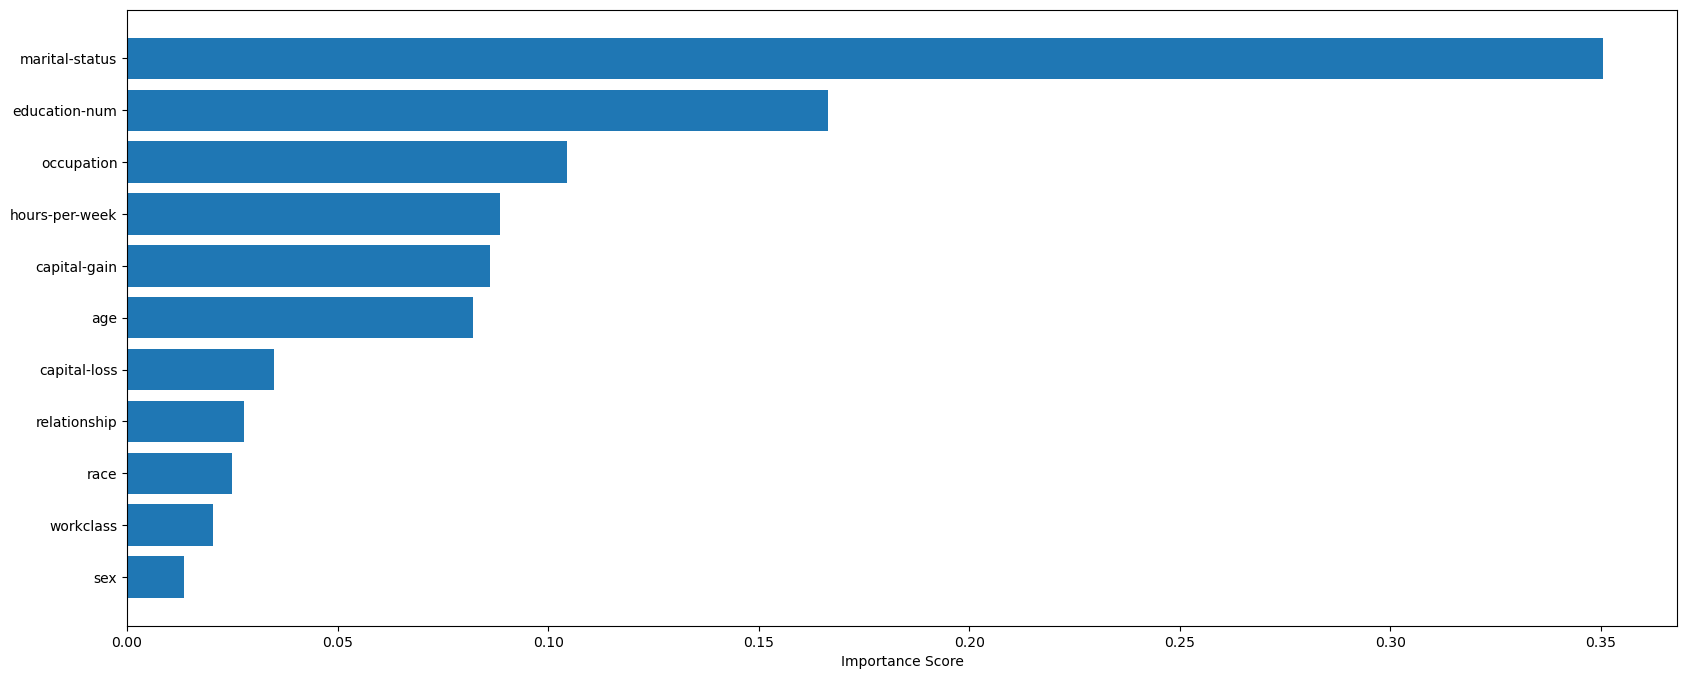

In [211]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# plot feature importance
plt.figure(figsize = (20,8))
# plot the scores
d = {cols[i]:importance[i] for i in range(len(cols))}
d = sorted(d.items(), key=lambda x:x[1])
plt.barh([i[0] for i in d],[i[1] for i in d])
plt.xlabel("Importance Score")
plt.show()

**Based on the above 3 feature importance tests, 3 common features with lease importance are sex, race and workclass so we can remove these un-important features for our modeling purpose**

In [212]:
# Based on above 3 feature importance score, removing features
_list = ['race','sex','workclass']
X_train_new,X_test_new = drop_cols(X_train,X_test,_list)

 Shape Before: Train: (30718, 11), Test:(15315, 11)
 Shape After: Train: (30718, 8), Test:(15315, 8)


In [213]:
adult_df.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,2,Gov,2,Single,Adm-clerical,Not-in-family,White,Male,0,0,3,0
1,3,Non-Gov,2,Married,Exec-managerial,Husband,White,Male,0,0,1,0


In [214]:
adult_df.to_csv('group_train.csv')
adult_df_test.to_csv('group_test.csv')

## ML Modelling

In [215]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, TimeDistributed
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import backend as k
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, LSTM, GRU, Bidirectional, Input
import random
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [216]:
#Uncomment to install
# !pip3 install imbalanced-learn

In [240]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
def train_test_oversample(X,y):
    print('==========SMOTE Over Sampling=============')
    # define oversampling strategy
    oversample = SMOTE()
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y_over))
    print('=================')
    return X_over,y_over

def train_test_randomoversample(X,y):
    print('==========RANDOM Over Sampling=============')
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y_over))
    print('=================')
    return X_over,y_over

In [241]:
def prep(useAllFeatures = True, oversample = False, isRandom = False):
    
    # Using Full Features
    if(useAllFeatures):
        X_train,y_train,X_test,y_test = train_test_split(adult_df,adult_df_test)
    else:
        _list = ['race','sex','workclass']
        adult_df_new,adult_df_test_new = drop_cols(adult_df,adult_df_test,_list)

        X_train,y_train,X_test,y_test = train_test_split(adult_df_new,adult_df_test_new)
    
    
    # Preparing X
    print("========Preparing X==========")
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    print("Getting Dummies")

    # one hot encoding
    # Getting the dummy variables for categorical iputs
    X_train = pd.get_dummies(X_train, drop_first = True)
    X_test = pd.get_dummies(X_test, drop_first = True)

    # Columns missing due to capital loss/gain categorical dummy variable
    # Get missing columns in the training test
    missing_cols = set( X_train.columns ) - set( X_test.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        X_test[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    X_test = X_test[X_train.columns]

    print(X_train.shape, X_test.shape)
    
    # Preparing Y
    print("========Preparing Y==========")
    # Coding training class label
    y_le = LabelEncoder()
    # y_le.fit(y_train)
    y_train = y_le.fit_transform(y_train)
    y_test = y_le.transform(y_test)
    
    if oversample:
        if isRandom:
            X_train,y_train = train_test_randomoversample(X_train,y_train)
        else:
            X_train,y_train = train_test_oversample(X_train,y_train)
    
    # Before Using Neural networks, it is require to convert the target class vector 
    # to a binary matrix
    y_train = to_categorical(y_train, 2)
    print('Label: ', y_train.shape)
    
            
    return X_train,y_train,X_test,y_test

In [219]:
def plot_history(history,name="fig"):
    print("|="*200)
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.savefig(name+'png')
    return plt;

In [220]:
def plot_roc_auc(fpr_rf, tpr_rf, thresholds_rf,auc_rf):
    plt.figure(1)
    plt.plot(fpr_rf, tpr_rf, label='(area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    
    plt.figure(2)
    plt.xlim(0, 0.5)
    plt.ylim(0.5, 1)
    plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (zoomed in at top left)')
    plt.legend(loc='best')
    plt.show()
    return;

In [221]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def score(y_test, y_classes):
    print("="*100)
    print("Accuracy Score: ",accuracy_score(y_true=y_test, y_pred=y_classes))
    print("Precision: ", precision_score(y_test, y_classes))
    print("Recall: ", recall_score(y_test, y_classes))
    print("F1: ", f1_score(y_test, y_classes))
    print("AUC: ", roc_auc_score(y_test, y_classes))
    print("="*100)
    print(classification_report(y_test, y_classes))
    print("="*100)
    cm = confusion_matrix(y_true=y_test, y_pred=y_classes)
    #display_labels=model.classes_
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.show()
    
def calc_threshold(y_prob):
    pass

def predict_acc(model,X_test,y_test):
    y_tst = model.predict(X_test)
    #y_prob = model.predict_proba(X_test)
    y_prob = y_tst
    y_classes = y_tst.argmax(axis=-1)
    #y_classes = y_le.inverse_transform(y_classes)
   
    # Getting the scores 
    score(y_test, y_classes)
    
    # Get the threshold using Youdens J statistic
    print("="*100)
    
    # display ROC_AUC
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob[:, 1])
    auc_rf = auc(fpr_rf, tpr_rf)
    plot_roc_auc(fpr_rf, tpr_rf, thresholds_rf,auc_rf)
    
    # Finding Optimal threshold
    print("|="*200)
    J = tpr_rf - fpr_rf
    ix = np.argmax(J)
    print("="*100)
    print('Best Threshold using Youdens J statistic =%f, J=%.3f' % (thresholds_rf[ix], J[ix]))
    threshold = thresholds_rf[ix]
    
    print("="*100)
    y_class_opt = np.where(y_prob[:, 1] > threshold, 1, 0)
    
    print("==After applying Threshold==")
    score(y_test, y_class_opt)
    

In [242]:
def execute(model_fun,useAllFeatures = True,isCNN=False, oversample = False, isRandom = False):
    print("|="*200)
    X_train, y_train,X_test,y_test = prep(useAllFeatures, oversample, isRandom)
    
    if isCNN==True:
        print("========RESHAPING=========")
        X_train = X_train.to_numpy().reshape(-1,X_train.shape[1],1)
        X_test = X_test.to_numpy().reshape(-1,X_train.shape[1],1)
        print("Shape train:",X_train.shape)
        print("Shape test:",X_test.shape)
    
    print("|="*200)
    # Using Tensor flow device where applicable
    with tf.device(SET_DEVICE):
        model = model_fun(X_train, y_train)
    print("|="*200)
    predict_acc(model,X_test,y_test)
    print("|="*200)
    

In [250]:
def model_0(X_train, y_train):
    model = Sequential()
    model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='sigmoid'))
    plot_model(model, to_file='model_0.png')
    print("|="*200)
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #model.pre
    model.summary()
    print("|="*200)
    # Train the model
    history = model.fit(X_train, y_train, epochs=30, batch_size=72,verbose=1, validation_split=0.25)
    # model.predict_proba
    plot_history(history).show()
    
    return model

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
 Shape Before: Train: (30718, 12), Test:(15315, 12)
 Shape After: Train: (30718, 9), Test:(15315, 9)
========Preparing X==========
(30718, 8) (30718,)
(15315, 8) (15315,)
Getting Dummies
(30718, 51) (15315, 51)
========Preparing Y==========
==========Over Sampling=============
Counter({0: 23068, 1: 23068})
Label:  (46136, 2)
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

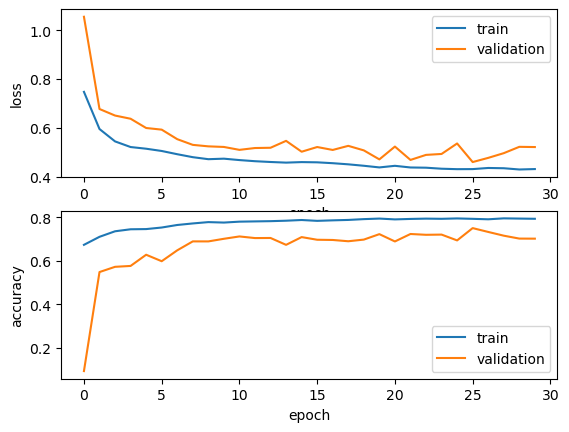

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
479/479 [==============================] - 1s 1ms/step
Accuracy Score:  0.8428338230492981
Precision:  0.7182603133994244
Recall:  0.5954400848356309
F1:  0.6511088563559936
AUC:  0.7595583860026721
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11543
           1       0.72      0.60      0.65      3772

    accuracy                           0.84     15315
   macro avg       0.80      0.76      0.77     15315
weighted avg       0.84      0.84      0.84     15315



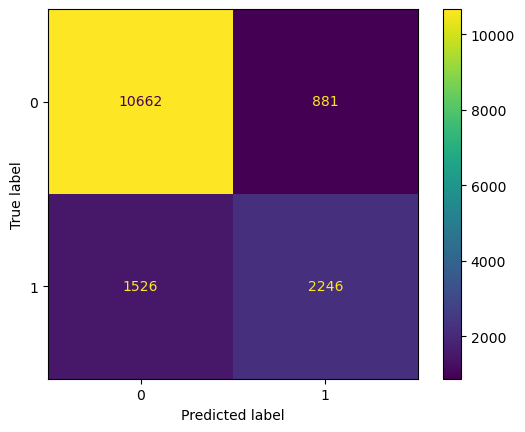

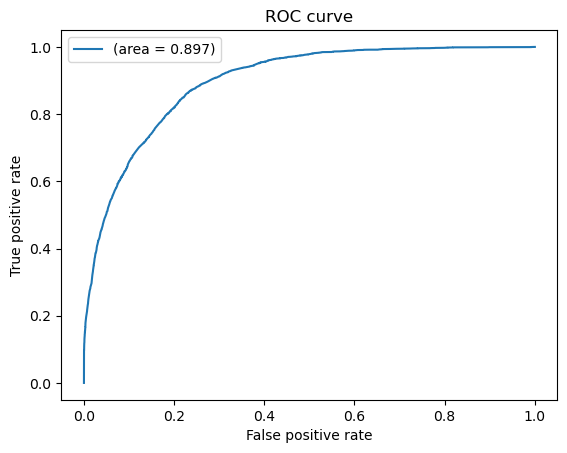

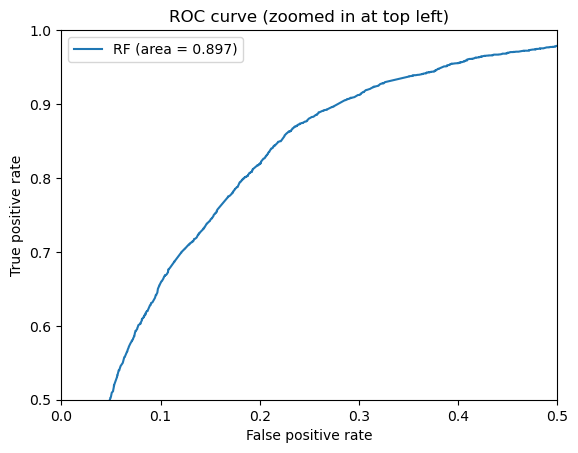

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
Best Threshold using Youdens J statistic =0.261916, J=0.634
==After applying Threshold==
Accuracy Score:  0.7908586353248449
Precision:  0.5475196258560214
Recall:  0.869034994697773
F1:  0.6717901424326264
AUC:  0.8171736525944899
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     11543
           1       0.55      0.87      0.67      3772

    accuracy                           0.79     15315
   macro avg       0.75      0.82      0.76     15315
weighted avg       0.85      0.79      0.80     15315



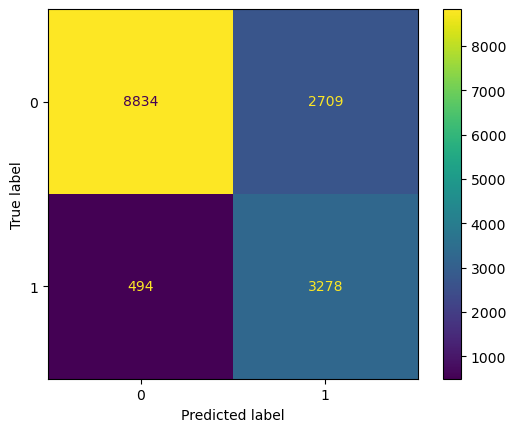

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [251]:
execute(model_0,useAllFeatures = False, oversample=True)

In [232]:
def model_1(X_train, y_train):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='sigmoid'))
    plot_model(model)
    print("|="*200)
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(lr=0.0005)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #model.pre
    model.summary()
    print("|="*200)
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=1, validation_split=0.1)
    # model.predict_proba
    plot_history(history).show()
    
    return model

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
========Preparing X==========
(30718, 11) (30718,)
(15315, 11) (15315,)
Getting Dummies
(30718, 54) (15315, 54)
========Preparing Y==========
Label:  (30718, 2)
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|

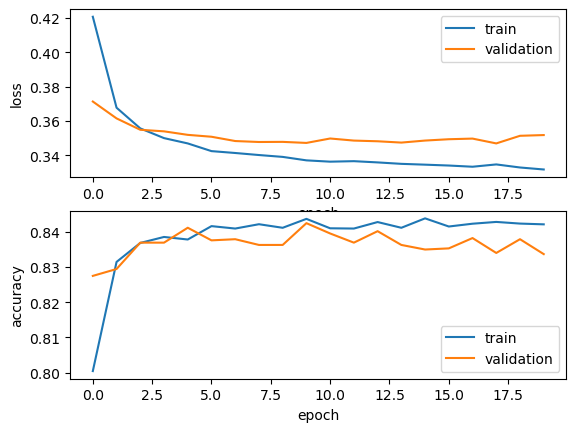

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
479/479 [==============================] - 1s 1ms/step
Accuracy Score:  0.8409402546523017
Precision:  0.7243116185359302
Recall:  0.5718451749734889
F1:  0.6391111111111112
AUC:  0.7503599088070252
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11543
           1       0.72      0.57      0.64      3772

    accuracy                           0.84     15315
   macro avg       0.80      0.75      0.77     15315
weighted avg       0.83      0.84      0.83     15315



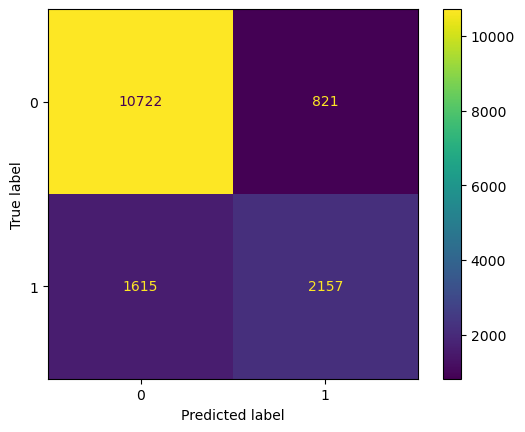

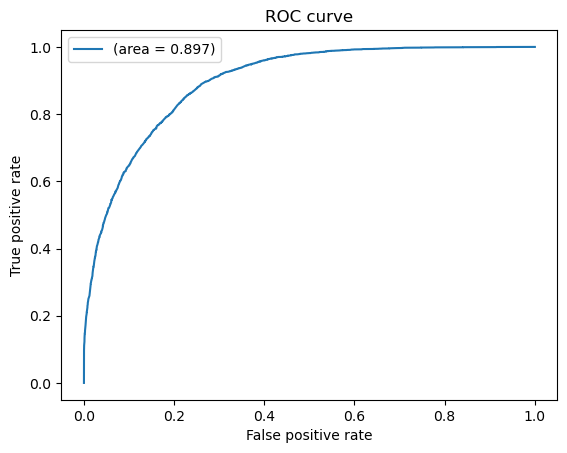

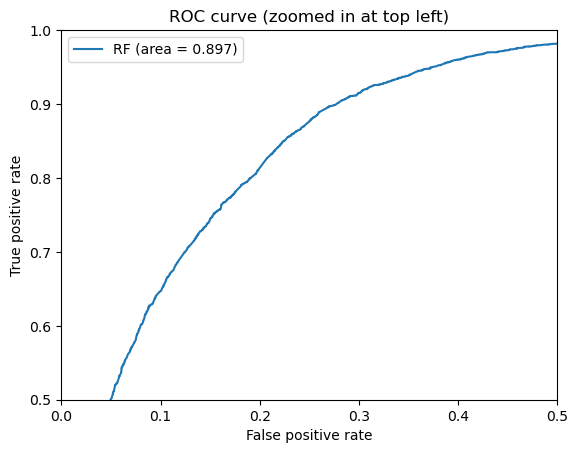

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
Best Threshold using Youdens J statistic =0.182724, J=0.629
==After applying Threshold==
Accuracy Score:  0.7769507019262162
Precision:  0.5280491648282383
Recall:  0.8883881230116649
F1:  0.6623838703301048
AUC:  0.8144617562125812
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11543
           1       0.53      0.89      0.66      3772

    accuracy                           0.78     15315
   macro avg       0.74      0.81      0.75     15315
weighted avg       0.85      0.78      0.79     15315



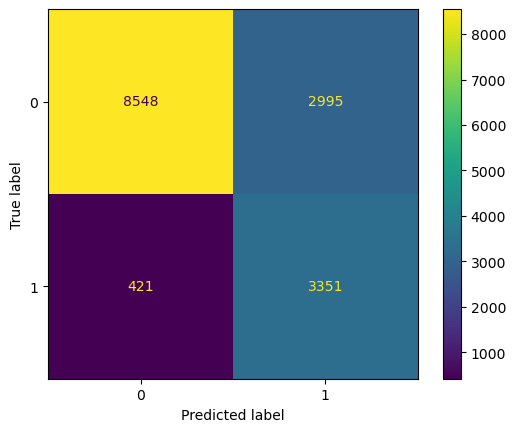

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [105]:
execute(model_1,useAllFeatures = True)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
========Preparing X==========
(30718, 11) (30718,)
(15315, 11) (15315,)
Getting Dummies
(30718, 54) (15315, 54)
========Preparing Y==========
==========Over Sampling=============
Counter({0: 23068, 1: 23068})
Label:  (46136, 2)
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|

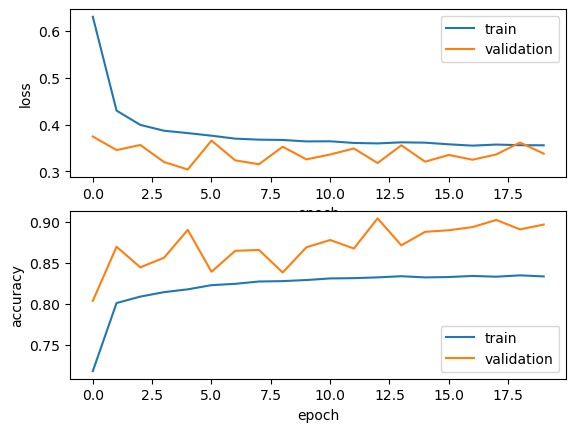

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
479/479 [==============================] - 1s 1ms/step
Accuracy Score:  0.8118837740777016
Precision:  0.5860204672716741
Recall:  0.8046129374337222
F1:  0.6781365210590996
AUC:  0.8094363309710412
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     11543
           1       0.59      0.80      0.68      3772

    accuracy                           0.81     15315
   macro avg       0.76      0.81      0.77     15315
weighted avg       0.84      0.81      0.82     15315



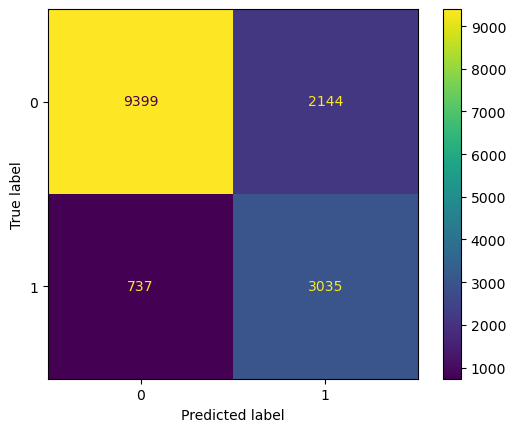

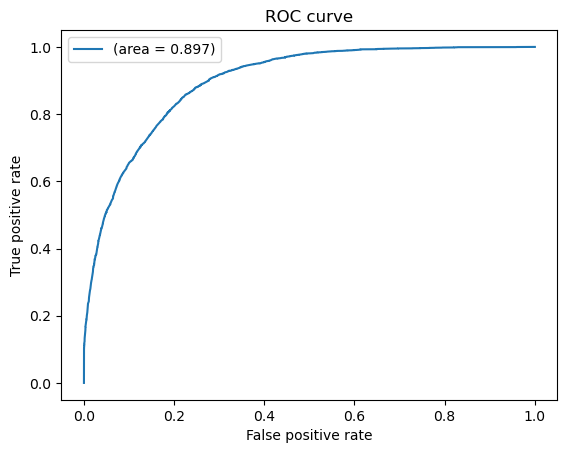

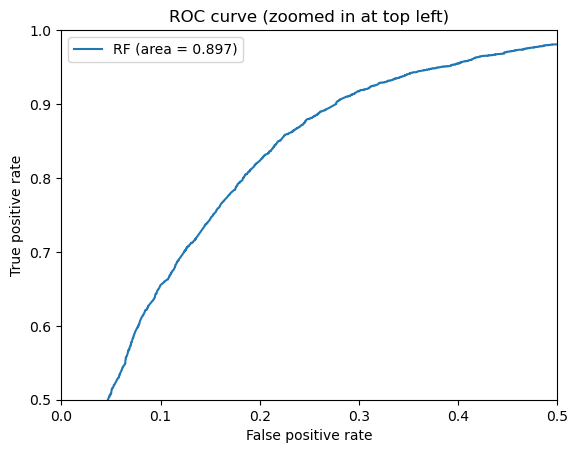

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
Best Threshold using Youdens J statistic =0.412392, J=0.633
==After applying Threshold==
Accuracy Score:  0.7951681358145609
Precision:  0.5543757492721356
Recall:  0.8581654294803818
F1:  0.6736031630423474
AUC:  0.8163737136139673
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     11543
           1       0.55      0.86      0.67      3772

    accuracy                           0.80     15315
   macro avg       0.75      0.82      0.76     15315
weighted avg       0.85      0.80      0.81     15315



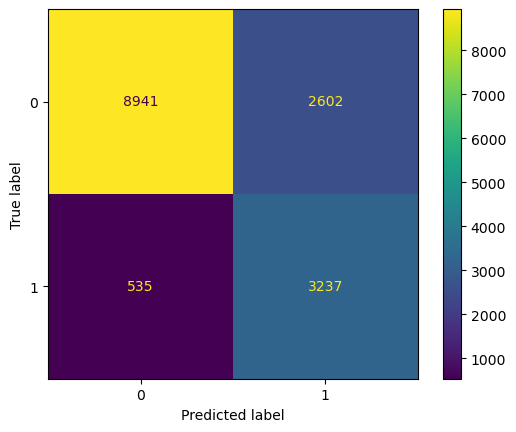

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [122]:
execute(model_1,useAllFeatures = True, oversample = True)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
 Shape Before: Train: (30718, 12), Test:(15315, 12)
 Shape After: Train: (30718, 9), Test:(15315, 9)
========Preparing X==========
(30718, 8) (30718,)
(15315, 8) (15315,)
Getting Dummies
(30718, 51) (15315, 51)
========Preparing Y==========
Label:  (30718, 2)
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|

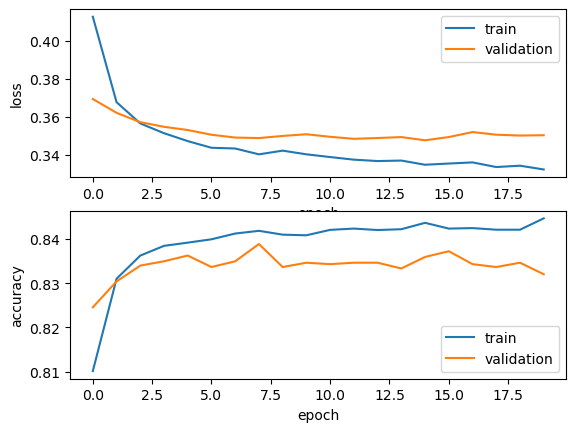

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
479/479 [==============================] - 1s 1ms/step
Accuracy Score:  0.8425073457394711
Precision:  0.7432045779685265
Recall:  0.5509013785790032
F1:  0.6327649208282582
AUC:  0.7443495890555937
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11543
           1       0.74      0.55      0.63      3772

    accuracy                           0.84     15315
   macro avg       0.80      0.74      0.77     15315
weighted avg       0.83      0.84      0.83     15315



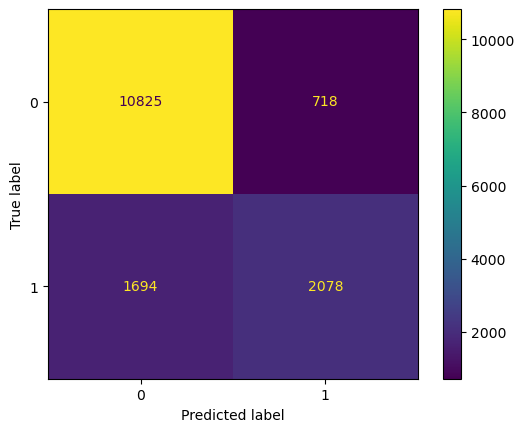

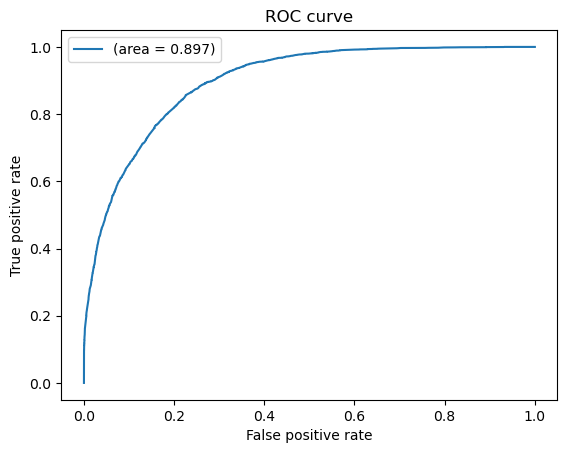

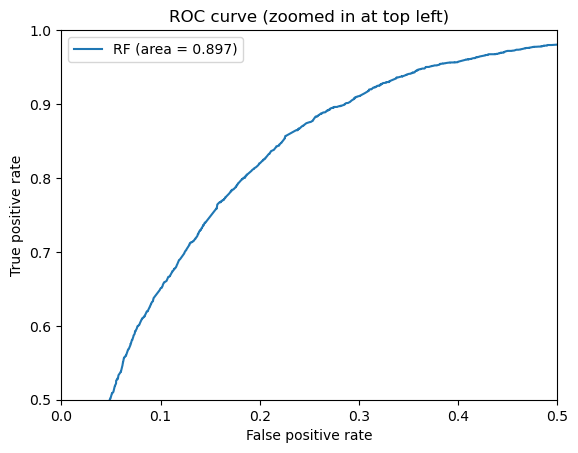

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
Best Threshold using Youdens J statistic =0.237902, J=0.631
==After applying Threshold==
Accuracy Score:  0.7945151811949069
Precision:  0.5535377762549255
Recall:  0.8565747613997879
F1:  0.6724945363721512
AUC:  0.8154051143913087
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     11543
           1       0.55      0.86      0.67      3772

    accuracy                           0.79     15315
   macro avg       0.75      0.82      0.76     15315
weighted avg       0.85      0.79      0.81     15315



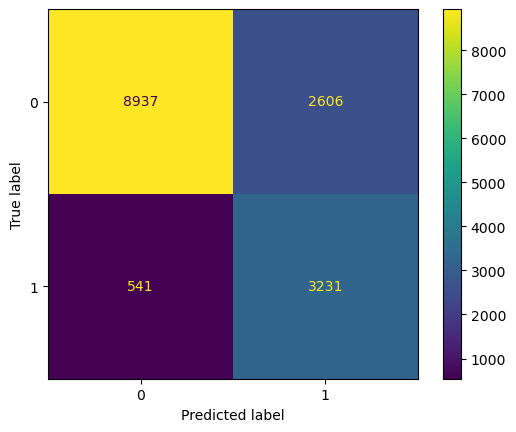

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [234]:
execute(model_1,useAllFeatures = False)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
 Shape Before: Train: (30718, 12), Test:(15315, 12)
 Shape After: Train: (30718, 9), Test:(15315, 9)
========Preparing X==========
(30718, 8) (30718,)
(15315, 8) (15315,)
Getting Dummies
(30718, 51) (15315, 51)
========Preparing Y==========
==========Over Sampling=============
Counter({0: 23068, 1: 23068})
Label:  (46136, 2)
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

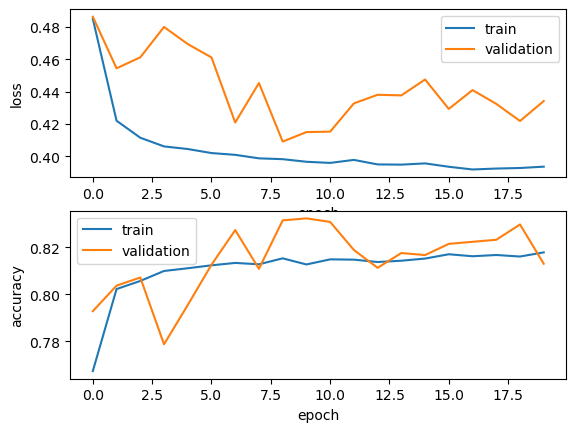

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
479/479 [==============================] - 1s 1ms/step
Accuracy Score:  0.8139079333986288
Precision:  0.5903567228537828
Recall:  0.7985153764581124
F1:  0.6788370520622042
AUC:  0.8087266304451178
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     11543
           1       0.59      0.80      0.68      3772

    accuracy                           0.81     15315
   macro avg       0.76      0.81      0.77     15315
weighted avg       0.84      0.81      0.82     15315



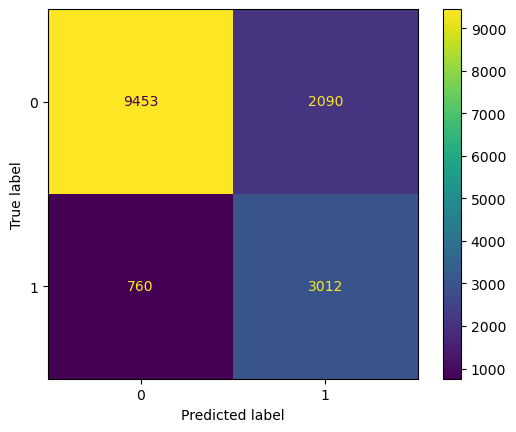

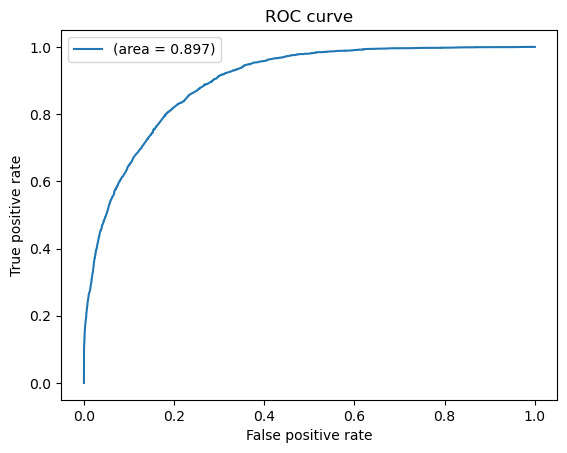

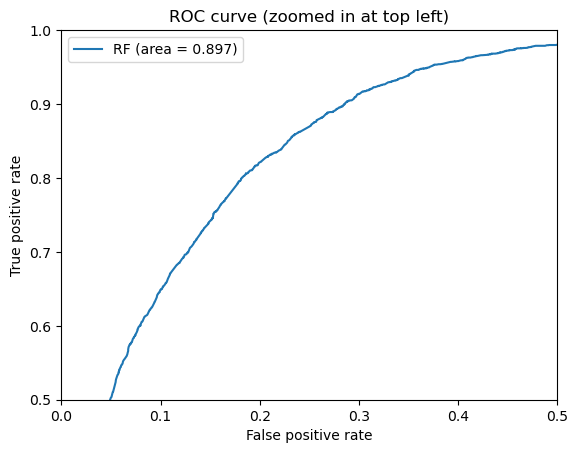

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
Best Threshold using Youdens J statistic =0.409074, J=0.624
==After applying Threshold==
Accuracy Score:  0.7879203395364022
Precision:  0.5439892545332438
Recall:  0.8589607635206787
F1:  0.6661184210526316
AUC:  0.81183332293681
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     11543
           1       0.54      0.86      0.67      3772

    accuracy                           0.79     15315
   macro avg       0.74      0.81      0.76     15315
weighted avg       0.84      0.79      0.80     15315



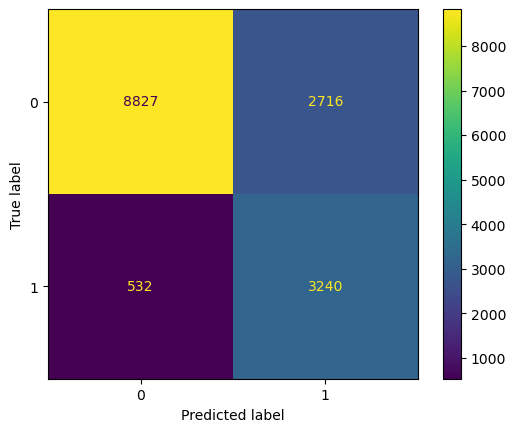

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [243]:
execute(model_1,useAllFeatures = False, oversample = True, isRandom=True)

In [229]:
def model_2(X_train, y_train):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(2, activation='sigmoid'))
    plot_model(model)
    print("|="*200)
    model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy'],
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    
    model.summary()
    print("|="*200)
        
    history = model.fit(X_train, y_train,
                        batch_size=50, epochs=30,
                        verbose=2,
                        validation_split=0.1)
        
    plot_history(history).show()
        
    return model


|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
========Preparing X==========
(30718, 11) (30718,)
(15315, 11) (15315,)
Getting Dummies
(30718, 54) (15315, 54)
========Preparing Y==========
==========Over Sampling=============
Counter({0: 23068, 1: 23068})
Label:  (46136, 2)
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|

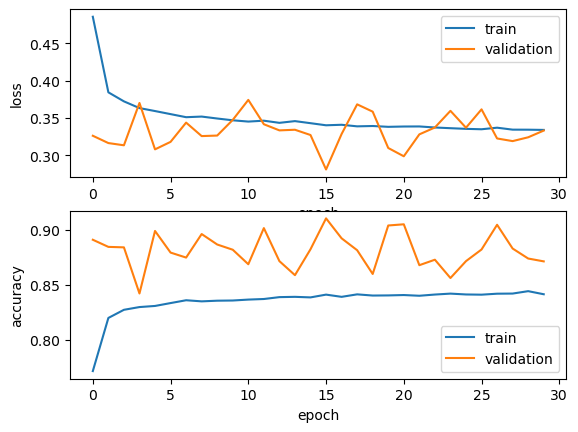

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
479/479 [==============================] - 1s 1ms/step
Accuracy Score:  0.8181521384263793
Precision:  0.60471037555697
Recall:  0.7555673382820784
F1:  0.6717737183264584
AUC:  0.797085410456122
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     11543
           1       0.60      0.76      0.67      3772

    accuracy                           0.82     15315
   macro avg       0.76      0.80      0.77     15315
weighted avg       0.84      0.82      0.82     15315



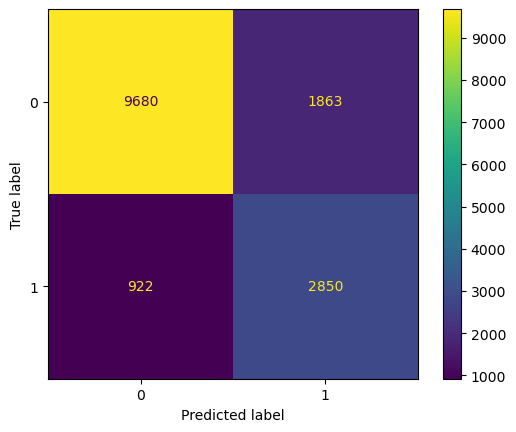

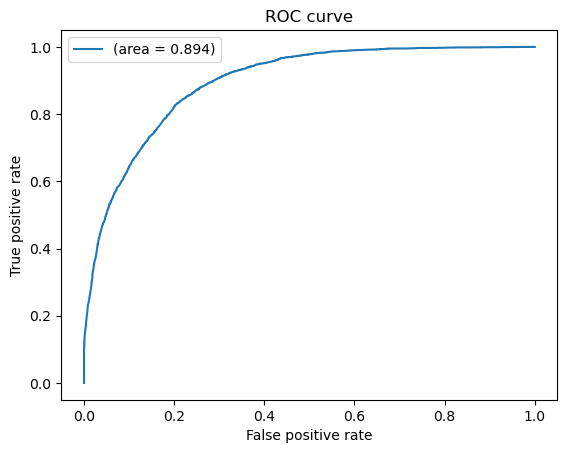

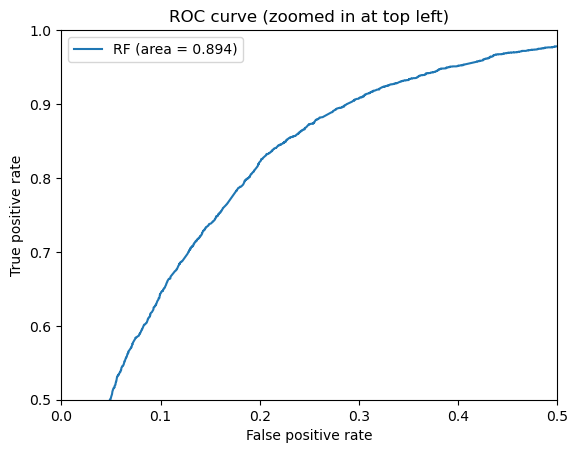

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
Best Threshold using Youdens J statistic =0.433122, J=0.626
==After applying Threshold==
Accuracy Score:  0.8028077048645119
Precision:  0.5680419833514296
Recall:  0.8321845174973489
F1:  0.6751989675198968
AUC:  0.812696261174387
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     11543
           1       0.57      0.83      0.68      3772

    accuracy                           0.80     15315
   macro avg       0.75      0.81      0.77     15315
weighted avg       0.84      0.80      0.81     15315



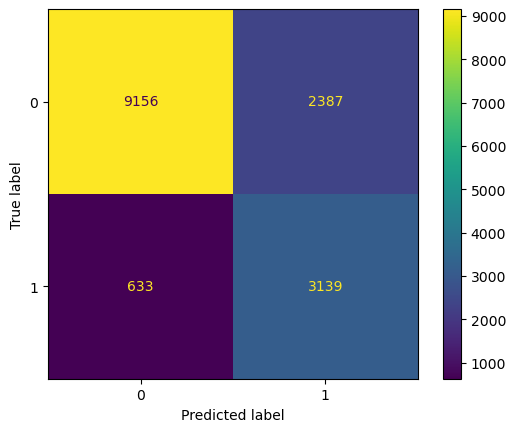

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [230]:
execute(model_2,useAllFeatures = True, oversample=True)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

========Preparing X==========

(30718, 11) (30718,)

(15315, 11) (15315,)

Getting Dummies

(30718, 54) (15315, 54)

========Preparing Y==========

Label:  (30718, 2)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

Model: "sequential_40"

____

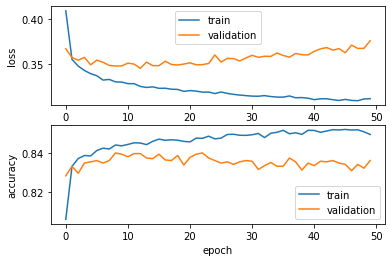

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Accuracy Score:  0.8372184133202742


              precision    recall  f1-score   support



           0       0.88      0.91      0.89     11543

           1       0.69      0.62      0.65      3772



    accuracy                           0.84     15315

   macro avg       0.78      0.76      0.77     15315

weighted avg       0.83      0.84      0.83     15315





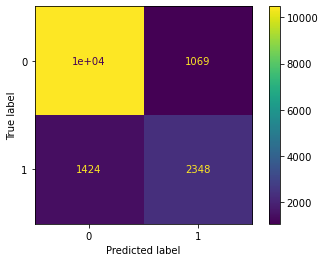

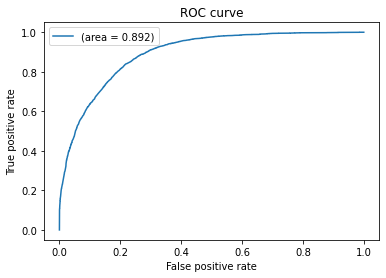

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Best Threshold=0.219475, J=0.622



Accuracy Score after using the threshold:  0.7967352269017304



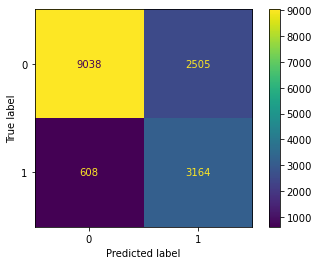


              precision    recall  f1-score   support



           0       0.94      0.78      0.85     11543

           1       0.56      0.84      0.67      3772



    accuracy                           0.80     15315

   macro avg       0.75      0.81      0.76     15315

weighted avg       0.84      0.80      0.81     15315




|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [184]:
execute(model_2,useAllFeatures = True)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

========Preparing X==========

(30718, 8) (30718,)

(15315, 8) (15315,)

Getting Dummies

(30718, 51) (15315, 51)

========Preparing Y==========

Label:  (30718, 2)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

Model: "sequential_42"

______

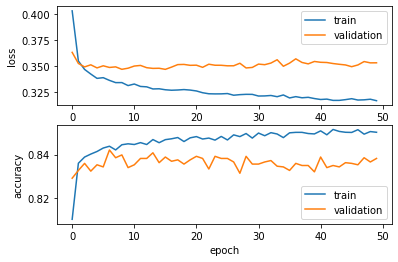

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Accuracy Score:  0.8393078681031668


              precision    recall  f1-score   support



           0       0.87      0.93      0.90     11543

           1       0.72      0.56      0.63      3772



    accuracy                           0.84     15315

   macro avg       0.80      0.75      0.76     15315

weighted avg       0.83      0.84      0.83     15315





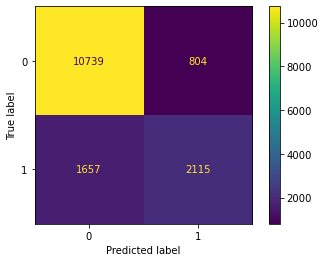

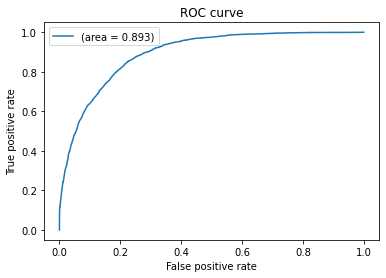

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Best Threshold=0.256055, J=0.628



Accuracy Score after using the threshold:  0.7939928174991838



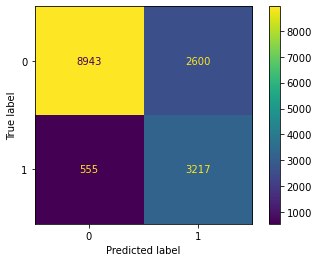


              precision    recall  f1-score   support



           0       0.94      0.77      0.85     11543

           1       0.55      0.85      0.67      3772



    accuracy                           0.79     15315

   macro avg       0.75      0.81      0.76     15315

weighted avg       0.85      0.79      0.81     15315




|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [186]:
execute(model_2,useAllFeatures = False)

In [236]:
def model_3(X_train, y_train):
    # Define the CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    plot_model(model)
    print("|="*200)
    model.compile(
            loss='binary_crossentropy',
            metrics=['accuracy'],
            optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5))
    
    model.summary()
    print("|="*200)

    history = model.fit(X_train, y_train,
                            batch_size=64, epochs=50,
                            verbose=2,
                            validation_split=0.1)

    plot_history(history).show()
        
    return model




|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

========Preparing X==========

(30718, 11) (30718,)

(15315, 11) (15315,)

Getting Dummies

(30718, 54) (15315, 54)

========Preparing Y==========

Label:  (30718, 2)

========RESHAPING=========

Shape train: (30718, 54, 1)

Shape test: (15315, 54, 1)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|

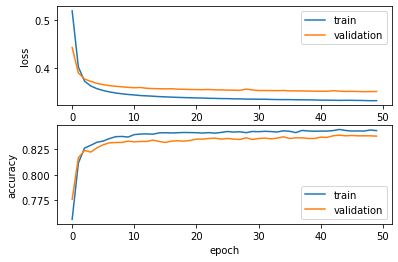

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Accuracy Score:  0.8428338230492981


              precision    recall  f1-score   support



           0       0.87      0.93      0.90     11543

           1       0.72      0.58      0.65      3772



    accuracy                           0.84     15315

   macro avg       0.80      0.76      0.77     15315

weighted avg       0.84      0.84      0.84     15315





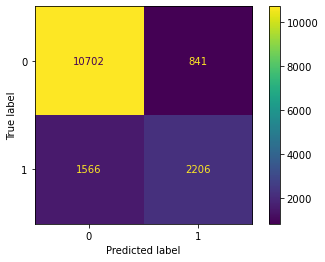

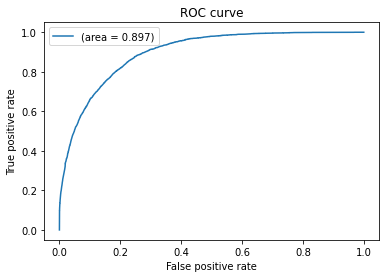

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Best Threshold=0.204898, J=0.629



Accuracy Score after using the threshold:  0.7828272935031015



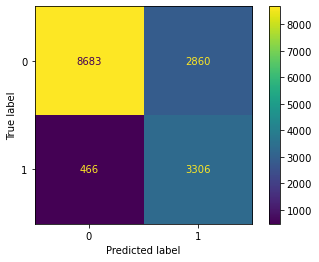


              precision    recall  f1-score   support



           0       0.95      0.75      0.84     11543

           1       0.54      0.88      0.67      3772



    accuracy                           0.78     15315

   macro avg       0.74      0.81      0.75     15315

weighted avg       0.85      0.78      0.80     15315




|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [188]:
execute(model_3,useAllFeatures = True, isCNN = True)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

========Preparing X==========

(30718, 8) (30718,)

(15315, 8) (15315,)

Getting Dummies

(30718, 51) (15315, 51)

========Preparing Y==========

Label:  (30718, 2)

========RESHAPING=========

Shape train: (30718, 51, 1)

Shape test: (15315, 51, 1)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|

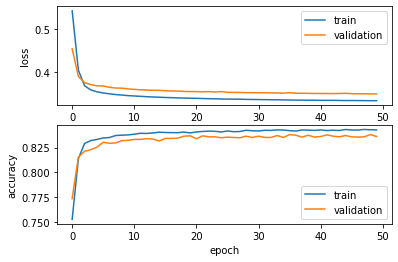

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Accuracy Score:  0.8423767548155403


              precision    recall  f1-score   support



           0       0.87      0.93      0.90     11543

           1       0.72      0.58      0.64      3772



    accuracy                           0.84     15315

   macro avg       0.80      0.75      0.77     15315

weighted avg       0.84      0.84      0.84     15315





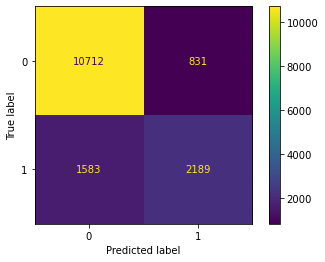

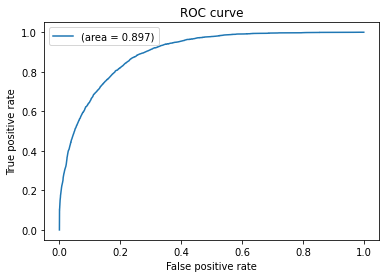

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Best Threshold=0.217486, J=0.631



Accuracy Score after using the threshold:  0.788050930460333



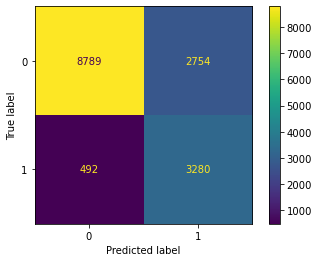


              precision    recall  f1-score   support



           0       0.95      0.76      0.84     11543

           1       0.54      0.87      0.67      3772



    accuracy                           0.79     15315

   macro avg       0.75      0.82      0.76     15315

weighted avg       0.85      0.79      0.80     15315




|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [189]:
execute(model_3,useAllFeatures = False, isCNN=True)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
 Shape Before: Train: (30718, 12), Test:(15315, 12)
 Shape After: Train: (30718, 9), Test:(15315, 9)
========Preparing X==========
(30718, 8) (30718,)
(15315, 8) (15315,)
Getting Dummies
(30718, 51) (15315, 51)
========Preparing Y==========
==========Over Sampling=============
Counter({0: 23068, 1: 23068})
Label:  (46136, 2)
========RESHAPING=========
Shape train: (46136, 51, 1)
Shape test: (15315, 51, 1)
|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

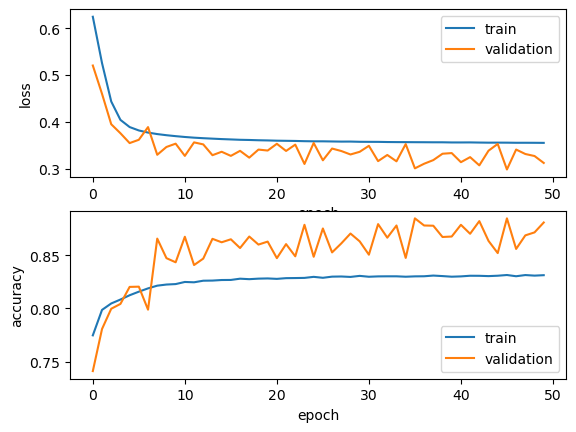

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
479/479 [==============================] - 1s 3ms/step
Accuracy Score:  0.815605615409729
Precision:  0.5923616523772408
Recall:  0.8059384941675504
F1:  0.682839173405211
AUC:  0.812351556708656
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     11543
           1       0.59      0.81      0.68      3772

    accuracy                           0.82     15315
   macro avg       0.76      0.81      0.78     15315
weighted avg       0.85      0.82      0.82     15315



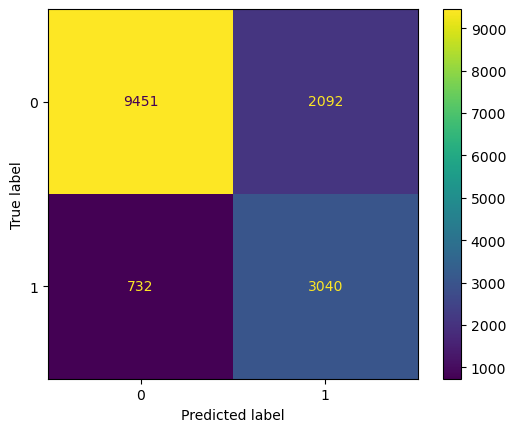

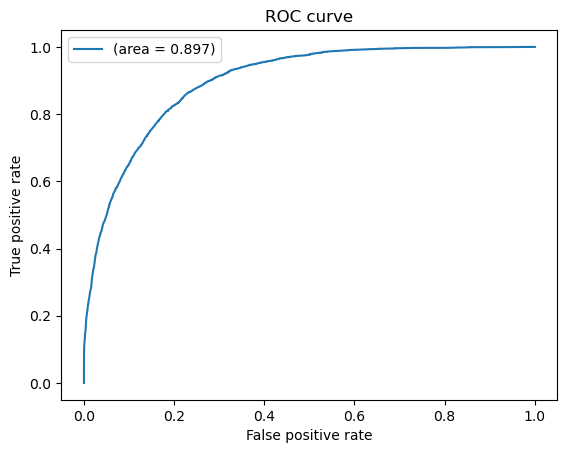

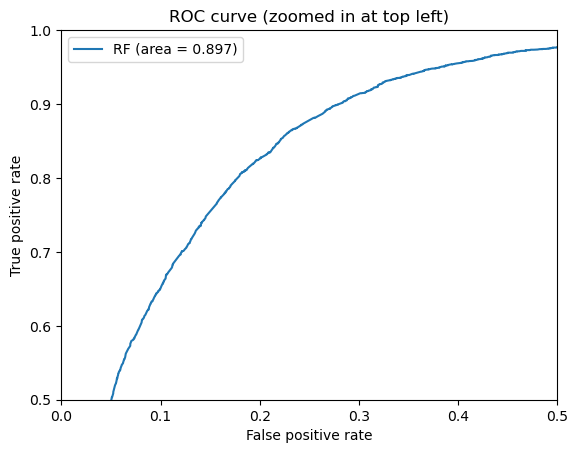

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=
Best Threshold using Youdens J statistic =0.395113, J=0.633
==After applying Threshold==
Accuracy Score:  0.7933398628795298
Precision:  0.5515367634572933
Recall:  0.8610816542948038
F1:  0.6723941620950212
AUC:  0.8161424904931526
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     11543
           1       0.55      0.86      0.67      3772

    accuracy                           0.79     15315
   macro avg       0.75      0.82      0.76     15315
weighted avg       0.85      0.79      0.81     15315



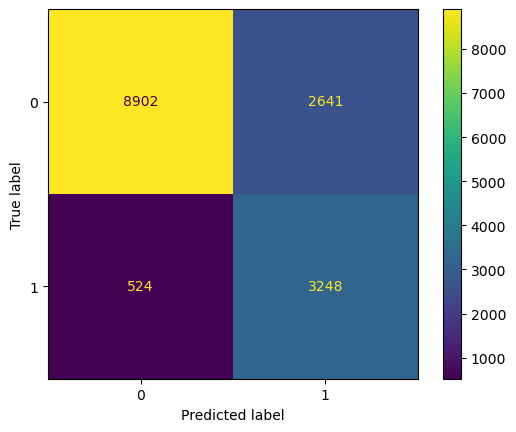

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [237]:
execute(model_3,useAllFeatures = False, isCNN=True, oversample=True)

In [190]:
def model_4(X_train, y_train):
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=0.4))
    model.add(Dense(2, activation='sigmoid'))
    plot_model(model)
    print("|="*200)
    model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy'],
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    
    model.summary()
    print("|="*200)
        
    history = model.fit(X_train, y_train,
                        batch_size=64, epochs=30,
                        verbose=2,
                        validation_split=0.2)
        
    plot_history(history).show()
        
    return model


|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

========Preparing X==========

(30718, 11) (30718,)

(15315, 11) (15315,)

Getting Dummies

(30718, 54) (15315, 54)

========Preparing Y==========

Label:  (30718, 2)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

Model: "sequential_45"

____

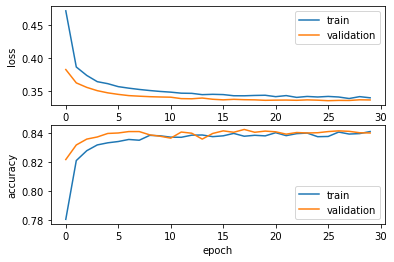

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Accuracy Score:  0.8417890956578518


              precision    recall  f1-score   support



           0       0.87      0.94      0.90     11543

           1       0.74      0.55      0.63      3772



    accuracy                           0.84     15315

   macro avg       0.80      0.74      0.77     15315

weighted avg       0.83      0.84      0.83     15315





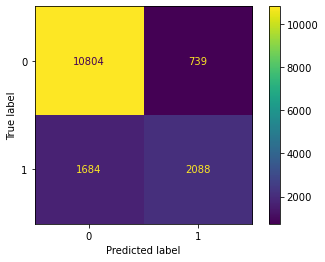

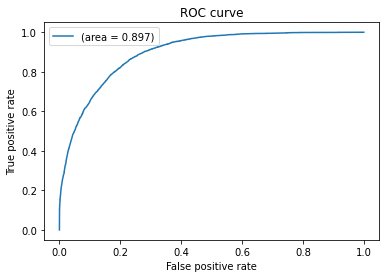

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Best Threshold=0.275316, J=0.631



Accuracy Score after using the threshold:  0.792033953640222



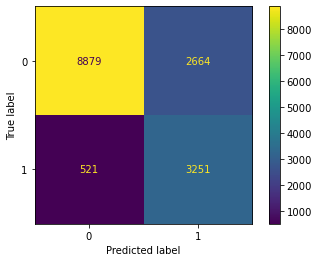


              precision    recall  f1-score   support



           0       0.94      0.77      0.85     11543

           1       0.55      0.86      0.67      3772



    accuracy                           0.79     15315

   macro avg       0.75      0.82      0.76     15315

weighted avg       0.85      0.79      0.80     15315




|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [191]:
execute(model_4, useAllFeatures = True)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

========Preparing X==========

(30718, 8) (30718,)

(15315, 8) (15315,)

Getting Dummies

(30718, 51) (15315, 51)

========Preparing Y==========

Label:  (30718, 2)

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=

Model: "sequential_46"

______

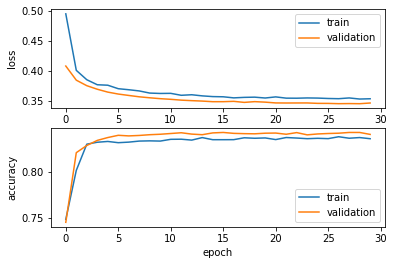

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Accuracy Score:  0.8437479595168136


              precision    recall  f1-score   support



           0       0.87      0.93      0.90     11543

           1       0.73      0.58      0.65      3772



    accuracy                           0.84     15315

   macro avg       0.80      0.76      0.77     15315

weighted avg       0.84      0.84      0.84     15315





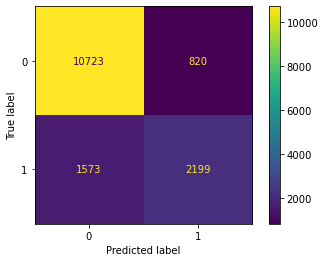

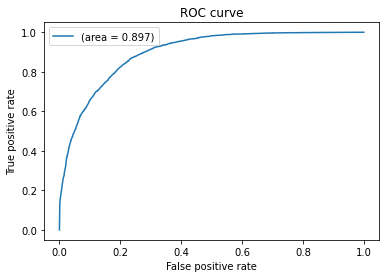

|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


Best Threshold=0.219432, J=0.633



Accuracy Score after using the threshold:  0.7922298400261182



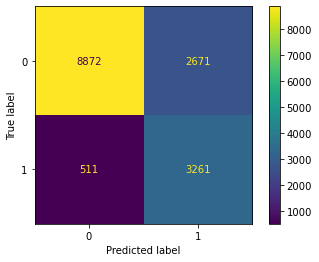


              precision    recall  f1-score   support



           0       0.95      0.77      0.85     11543

           1       0.55      0.86      0.67      3772



    accuracy                           0.79     15315

   macro avg       0.75      0.82      0.76     15315

weighted avg       0.85      0.79      0.80     15315




|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=|=


In [192]:
execute(model_4, useAllFeatures = False)